In [464]:
import pandas as pd
from collections import Counter

def count_unique_values(df: pd.DataFrame, column_name: str) -> tuple[dict, int]:
    # Pobieramy kolumnę i usuwamy wartości NaN
    values = df[column_name].dropna()
    
    # Lista na wszystkie unikalne wartości
    all_values = []
    
    # Iterujemy po wartościach kolumny
    for value in values:
        # Rozdzielamy tekst na fragmenty po średniku
        split_values = value.split(';')
        
        # Usuwamy nadmiarowe spacje i dodajemy do listy
        all_values.extend([v.strip() for v in split_values if v.strip()])

    # Zliczamy unikalne wartości
    unique_counts = Counter(all_values)
    
    # Zwracamy słownik z unikalnymi wartościami oraz ich liczbą
    return dict(unique_counts)

In [465]:
import pandas as pd
from collections import Counter

# Funkcja do zliczania unikalnych wartości w kolumnie
def count_unique_values(df: pd.DataFrame, column_name: str) -> tuple[dict, int]:
    # Pobieramy kolumnę i usuwamy wartości NaN
    values = df[column_name].dropna()
    
    # Lista na wszystkie unikalne wartości
    all_values = []
    
    # Iterujemy po wartościach kolumny
    for value in values:
        # Rozdzielamy tekst na fragmenty po średniku
        split_values = value.split(';')
        
        # Usuwamy nadmiarowe spacje i dodajemy do listy
        all_values.extend([v.strip() for v in split_values if v.strip()])

    # Zliczamy unikalne wartości
    unique_counts = Counter(all_values)
    
    # Zwracamy słownik z unikalnymi wartościami oraz ich liczbą
    return dict(unique_counts)


In [466]:
df = pd.read_excel('/Users/alicjawojciechowska/Documents/GitHub/ECHA_2025_phase2/new_inventoryPHASE2.xlsx', sheet_name = 'NAMs initiatives & projects')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/alicjawojciechowska/Documents/GitHub/ECHA_2025_phase2/new_inventoryPHASE2.xlsx'

In [ ]:
# Testujemy funkcję
wynik = count_unique_values(df, 'General purpose (e.g. NAMs development, data generation, NAMs definition development, NAMs database development etc.)')
print(wynik)  # Oczekiwany output: {'jabłko': 3, 'banan': 3, 'gruszka': 2, 'winogrono': 1}

{'NAMs development': 54, 'data generation': 17, 'Integration of New Approach Methodologies results in chemical risk assessments': 1, 'NAMs validation': 1, 'promoting the use of NAMs': 1, 'This document is intended to assist method developers, regulated industry stakeholders, and federal agencies in the development, validation, qualification, and acceptance of scientifically relevant new approach methodologies (NAMs).': 1, 'NAMs database development': 5, 'NAMs strategy development for regulatory decision-making': 1, 'Training and knowledge-sharing on NAMs for skin sensitisation assessment.': 1, 'improving the EU chemical safety assessment system': 1, 'NAMs regulations': 1, 'NAMs models database development (for biomedical research)': 1, 'evaluation, promotion, and harmonization of alternatives to animal use': 2, 'integration': 1, 'Evaluation of NAMs and Integrated Testing Approaches and Data Generated from such methods': 1, 'NAMs integration': 1, 'NAMs* database (*not only)': 1, 'NAMs t

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from textwrap import wrap

In [ ]:
df = pd.read_excel("/Users/alicjawojciechowska/Documents/GitHub/ECHA_2025_phase2/archive/archive_new_inventoryPHASE2.xlsx", sheet_name = "plot data")

In [ ]:
data = df["General purpose"]

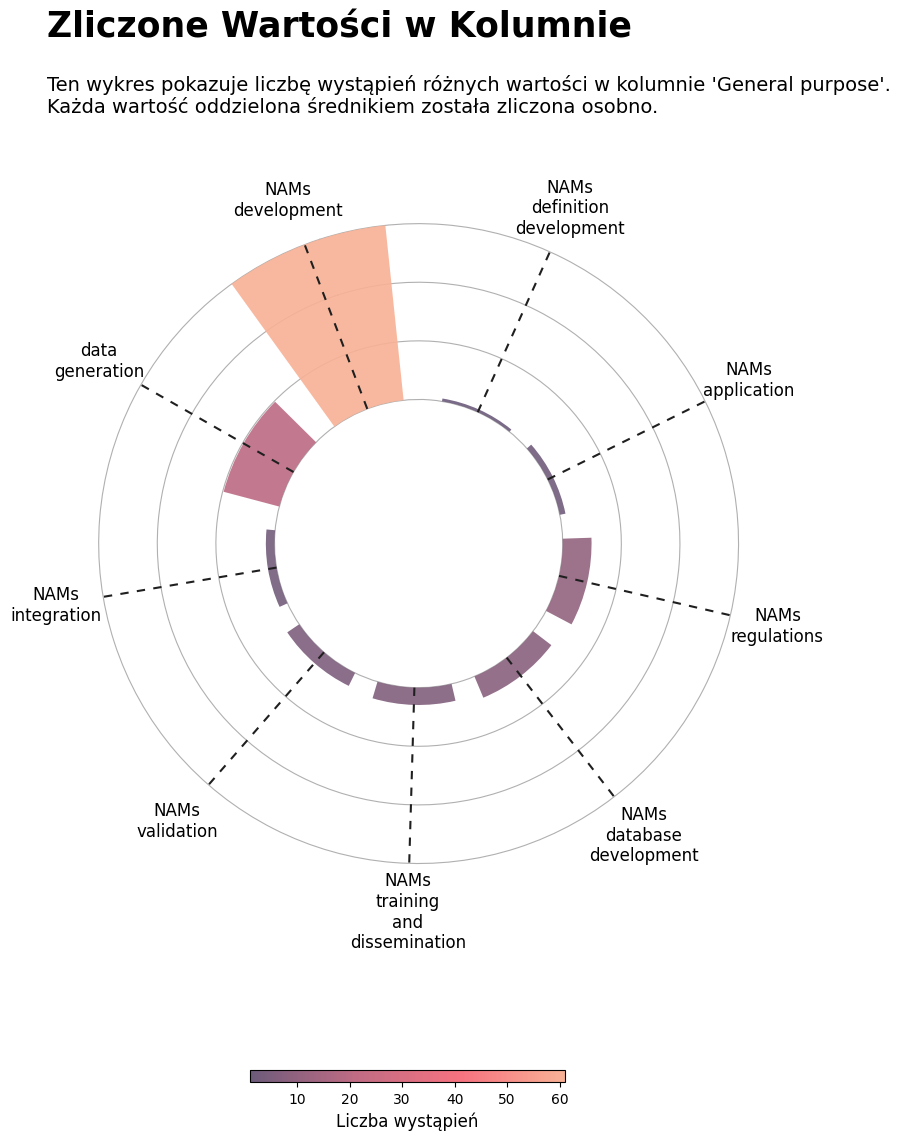

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from collections import Counter
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from textwrap import wrap

# Zakładając, że masz już dane w DataFrame
# data = pd.DataFrame({
#     "General purpose (e.g. NAMs development, data generation, NAMs database development etc.)": [
#         "NAMs development; data generation",
#         "NAMs development",
#         "data generation",
#         "NAMs database development; data generation",
#         "NAMs development",
#         "NAMs database development",
#         "data generation",
#         "NAMs development"
#     ]
# })

# 1. Podzielimy dane na wartości rozdzielone średnikami
data_split = df["General purpose"].str.split(";")

# 2. Rozwijamy listy do pojedynczych wartości
expanded_data = data_split.explode()

# 3. Usuwamy nadmiarowe białe znaki
expanded_data = expanded_data.str.strip()

# 4. Usuwamy wartości NaN
expanded_data = expanded_data.dropna()

# 5. Zliczamy wystąpienia każdego z elementów
counter = Counter(expanded_data)

# 6. Przygotowanie danych do wykresu
labels = list(counter.keys())  # Kategorii
values = list(counter.values())  # Liczba wystąpień

# Przekształcenie danych do formy wykresu polarnego

# Rozkład wartości na kąty
ANGLES = np.linspace(0.05, 2 * np.pi - 0.05, len(labels), endpoint=False)

# Przygotowanie wartości wysokości słupków
LENGTHS = values

# Przygotowanie kolorów dla każdej kategorii
GREY12 = "#1f1f1f"
COLORS = ["#6C5B7B", "#C06C84", "#F67280", "#F8B195"]
cmap = mpl.colors.LinearSegmentedColormap.from_list("my color", COLORS, N=256)
norm = mpl.colors.Normalize(vmin=min(values), vmax=max(values))
COLORS = cmap(norm(values))

# Ustawienia wykresu
fig, ax = plt.subplots(figsize=(9, 12.6), subplot_kw={"projection": "polar"})

# Ustawienia tła wykresu
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

# Ustawienia osi i zakresu
ax.set_theta_offset(1.2 * np.pi / 2)
ax.set_ylim(-50, max(LENGTHS) + 10)

# Rysowanie słupków reprezentujących liczbę wystąpień
ax.bar(ANGLES, LENGTHS, color=COLORS, alpha=0.9, width=0.52, zorder=10)

# Rysowanie linii referencyjnych
ax.vlines(ANGLES, 0, max(LENGTHS), color=GREY12, ls=(0, (4, 4)), zorder=11)

# Upewniamy się, że wszystkie etykiety są ciągami znaków, a potem je zawijamy
labels = [str(label) for label in labels]  # Konwersja na str
labels_wrapped = ["\n".join(wrap(r, 5, break_long_words=False)) for r in labels]

# Rysowanie etykiet dla regionów
ax.set_xticks(ANGLES)
ax.set_xticklabels(labels_wrapped, size=12)

# Usunięcie niepotrzebnych siatek
ax.xaxis.grid(False)
ax.set_yticklabels([])
ax.set_yticks([0, max(LENGTHS) / 3, 2 * max(LENGTHS) / 3, max(LENGTHS)])

# Usunięcie ramki
ax.spines["start"].set_color("none")
ax.spines["polar"].set_color("none")

# Ustawienie tekstów na wykresie
fig.text(0.1, 0.93, "Zliczone Wartości w Kolumnie", fontsize=25, weight="bold", ha="left", va="baseline")
fig.text(0.1, 0.9, "Ten wykres pokazuje liczbę wystąpień różnych wartości w kolumnie 'General purpose'.\nKażda wartość oddzielona średnikiem została zliczona osobno.", fontsize=14, ha="left", va="top")

# Dodanie legendy z kolorami przy użyciu ColorbarBase
fig.subplots_adjust(bottom=0.175)

# Tworzenie obiektu colorbar
cbaxes = inset_axes(ax, width="100%", height="100%", loc="center", bbox_to_anchor=(0.325, 0.1, 0.35, 0.01), bbox_transform=fig.transFigure)

# Tworzymy obiekt ColorbarBase
cbar = mpl.colorbar.ColorbarBase(cbaxes, cmap=cmap, norm=norm, orientation="horizontal")
cbar.set_label("Liczba wystąpień", size=12)

# Wyświetlenie wykresu
plt.show()


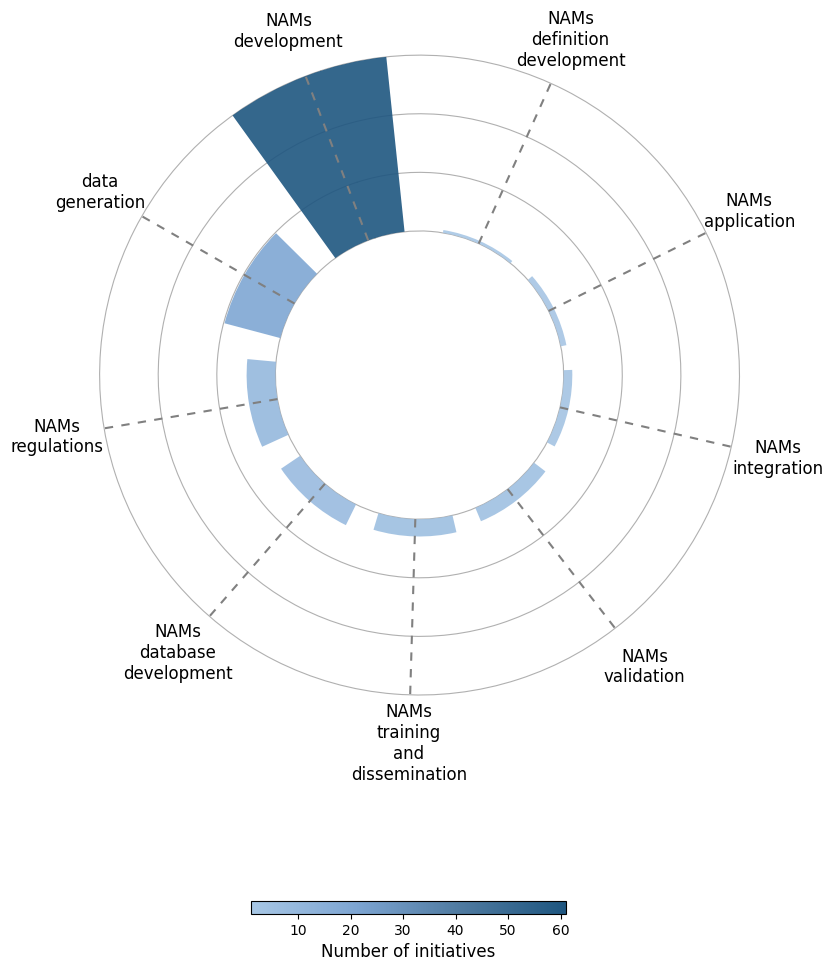

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from collections import Counter
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from textwrap import wrap

# Zakładając, że masz już dane w DataFrame
# data = pd.DataFrame({
#     "General purpose (e.g. NAMs development, data generation, NAMs database development etc.)": [
#         "NAMs development; data generation",
#         "NAMs development",
#         "data generation",
#         "NAMs database development; data generation",
#         "NAMs development",
#         "NAMs database development",
#         "data generation",
#         "NAMs development"
#     ]
# })

# 1. Podzielimy dane na wartości rozdzielone średnikami
data_split = df["General purpose"].str.split(";")

# 2. Rozwijamy listy do pojedynczych wartości
expanded_data = data_split.explode()

# 3. Usuwamy nadmiarowe białe znaki
expanded_data = expanded_data.str.strip()

# 4. Usuwamy wartości NaN
expanded_data = expanded_data.dropna()

# 5. Zliczamy wystąpienia każdego z elementów
counter = Counter(expanded_data)

# 6. Przygotowanie danych do wykresu
labels = list(counter.keys())  # Kategorii
values = list(counter.values())  # Liczba wystąpień

# Sortowanie wartości malejąco
sorted_values, sorted_labels = zip(*sorted(zip(values, labels), reverse=True))

# Przekształcenie danych do formy wykresu polarnego

# Rozkład wartości na kąty (w taki sposób, żeby wartości były rozłożone w jednym kierunku)
ANGLES = np.linspace(0.05, 2 * np.pi - 0.05, len(sorted_labels), endpoint=False)

# Przygotowanie wartości wysokości słupków
LENGTHS = sorted_values

# Tworzymy niestandardową paletę kolorów
# Zmieniamy najjaśniejszy odcień, by był ciemniejszy
custom_colors = ["#A8C7E5", "#7DA5D2", "#4F7AA0", "#1E5680"]
cmap = mpl.colors.LinearSegmentedColormap.from_list("custom_blues", custom_colors, N=256)
norm = mpl.colors.Normalize(vmin=min(LENGTHS), vmax=max(LENGTHS))
COLORS = cmap(norm(LENGTHS))

# Ustawienia wykresu
fig, ax = plt.subplots(figsize=(9, 12.6), subplot_kw={"projection": "polar"})

# Ustawienia tła wykresu
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

# Ustawienia osi i zakresu
ax.set_theta_offset(1.2 * np.pi / 2)  # Ustawienie przesunięcia, aby wykres był bardziej czytelny
ax.set_ylim(-50, max(LENGTHS) + 10)  # Ustawienie zakresu osi

# Rysowanie słupków reprezentujących liczbę wystąpień
ax.bar(ANGLES, LENGTHS, color=COLORS, alpha=0.9, width=0.52, zorder=10)

# Rysowanie linii referencyjnych
ax.vlines(ANGLES, 0, max(LENGTHS), color="grey", ls=(0, (4, 4)), zorder=11)

# Upewniamy się, że wszystkie etykiety są ciągami znaków, a potem je zawijamy
sorted_labels = [str(label) for label in sorted_labels]  # Konwersja na str
labels_wrapped = ["\n".join(wrap(r, 5, break_long_words=False)) for r in sorted_labels]

# Rysowanie etykiet dla regionów
ax.set_xticks(ANGLES)
ax.set_xticklabels(labels_wrapped, size=12)

# Usunięcie niepotrzebnych siatek
ax.xaxis.grid(False)
ax.set_yticklabels([])
ax.set_yticks([0, max(LENGTHS) / 3, 2 * max(LENGTHS) / 3, max(LENGTHS)])

# Usunięcie ramki
ax.spines["start"].set_color("none")
ax.spines["polar"].set_color("none")

# Ustawienie tekstów na wykresie
#fig.text(0.1, 0.93, "Zliczone Wartości w Kolumnie", fontsize=25, weight="bold", ha="left", va="baseline")
#fig.text(0.1, 0.9, "Ten wykres pokazuje liczbę wystąpień różnych wartości w kolumnie 'General purpose'.\nKażda wartość oddzielona średnikiem została zliczona osobno.", fontsize=14, ha="left", va="top")

# Dodanie legendy z kolorami przy użyciu ColorbarBase
fig.subplots_adjust(bottom=0.175)

# Tworzenie obiektu colorbar
cbaxes = inset_axes(ax, width="100%", height="100%", loc="center", bbox_to_anchor=(0.325, 0.1, 0.35, 0.01), bbox_transform=fig.transFigure)

# Tworzymy obiekt ColorbarBase
cbar = mpl.colorbar.ColorbarBase(cbaxes, cmap=cmap, norm=norm, orientation="horizontal")
cbar.set_label("Number of initiatives", size=12)

# Wyświetlenie wykresu
plt.show()


In [ ]:
unique_labels = set(labels)
print("Unikatowe wartości na wykresie:")
for label in unique_labels:
    print(label)

Unikatowe wartości na wykresie:
NAMs integration
data generation
NAMs definition development
NAMs database development
NAMs application
NAMs regulations
NAMs development
NAMs validation
NAMs training and dissemination


In [473]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Wczytanie pliku Excel
file_path = "/Users/alicjawojciechowska/Documents/GitHub/ECHA_2025_phase2/archive/archive_new_inventoryPHASE2.xlsx"  # Zastąp odpowiednią ścieżką do pliku
df = pd.read_excel(file_path, sheet_name = "plot data (2)")

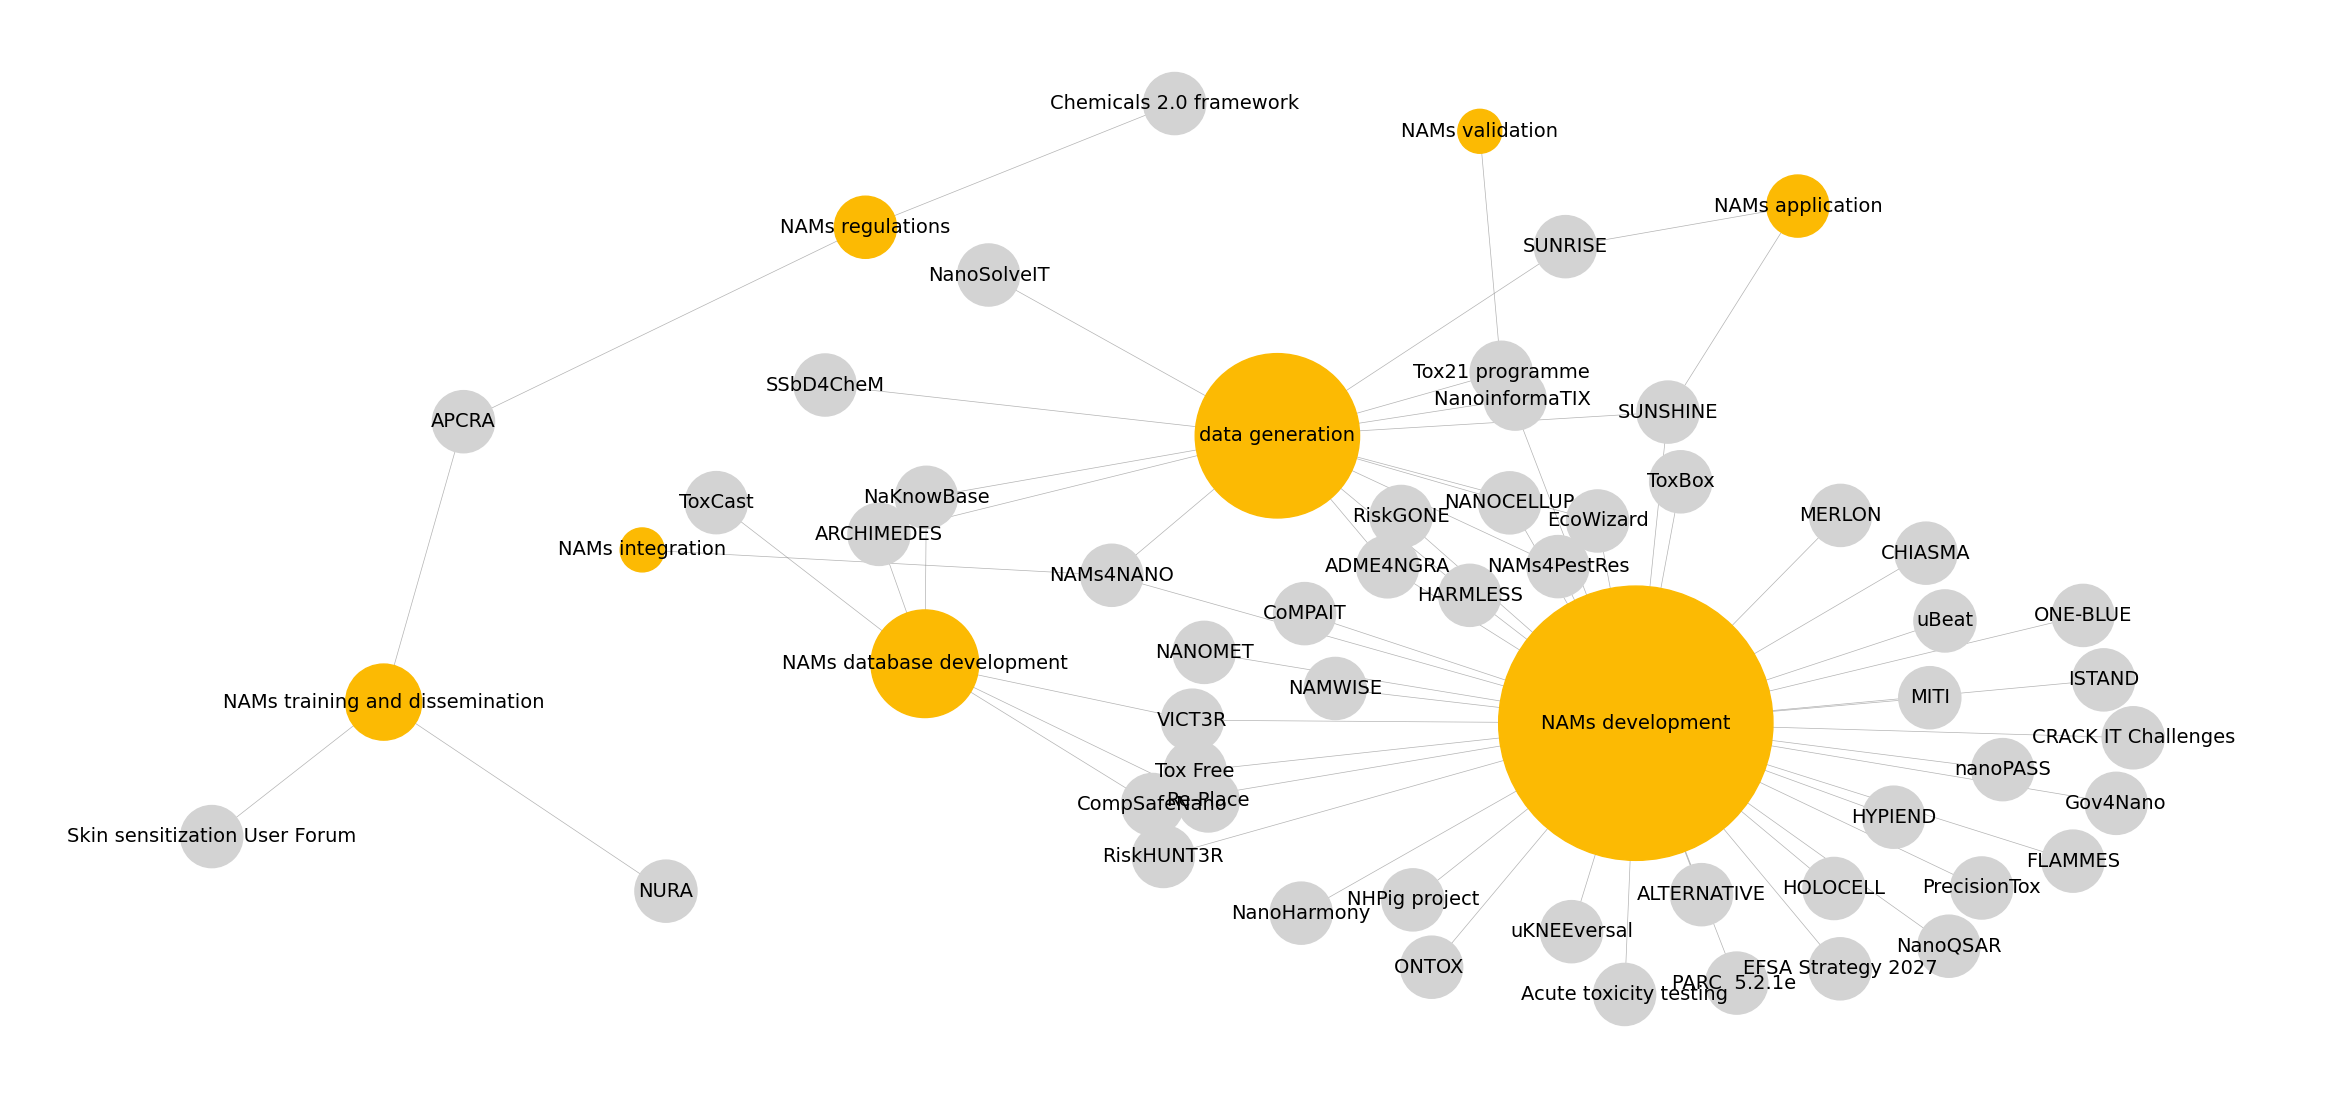

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Usuwanie wierszy z NaN w kolumnach 'Funder' i 'General purpose'
df = df.dropna(subset=['Initiative', 'General purpose'])

# Tworzenie grafu
G = nx.Graph()

# Liczenie wystąpień celów (general purpose)
purpose_counts = {}

# Iteracja przez wiersze dataframe
for index, row in df.iterrows():
    funder = row['Initiative']
    general_purpose = row['General purpose']

    # Sprawdzamy, czy 'general_purpose' jest tekstem (string)
    if isinstance(general_purpose, str):
        # Podział wartości w kolumnie 'General purpose' na cele
        purposes = general_purpose.split(';')  # Rozdzielamy po średniku

        for purpose in purposes:
            # Usuwamy zbędne spacje z celów
            purpose = purpose.strip()

            # Dodajemy krawędź do grafu (powiązanie między funderem a celem)
            G.add_edge(funder, purpose)

            # Liczenie wystąpień celów
            if purpose not in purpose_counts:
                purpose_counts[purpose] = 1
            else:
                purpose_counts[purpose] += 1

    else:
        # Jeśli 'general_purpose' jest wartością inną niż tekst, pomijamy ten wiersz
        print(f"Warning: 'General purpose' w wierszu {index} nie jest tekstem: {general_purpose}")

# Wizualizacja grafu
plt.figure(figsize=(30, 14))

# Ustawienie układu (większe rozluźnienie węzłów)
pos = nx.spring_layout(G, k=0.7, iterations=100, seed=2)  # Zwiększenie wartości k, by rozluźnić węzły

# Określenie kolorów węzłów
node_colors = []
node_sizes = []

for node in G.nodes():
    if node in df['Initiative'].values:
        node_colors.append('lightgray')  # Jaśniejszy niebieski dla fundera
        node_sizes.append(2000)  # Stały rozmiar węzła fundera
    else:
        node_colors.append('#fcba03')  # Jaśniejszy niebieski dla celu
        # Rozmiar węzła zależny od liczby wystąpień
        node_sizes.append(purpose_counts.get(node, 1) * 1000)  # Większy rozmiar dla częściej występujących celów

# Rysowanie węzłów
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors)  # Węzły (rozmiar zależny od częstotliwości)

# Rysowanie krawędzi
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.6, edge_color='gray')  # Krawędzie

# Rysowanie etykiet
nx.draw_networkx_labels(G, pos, font_size=14, font_color='black')  # Etykiety

# Usuwanie ramki wykresu
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Usuwanie osi
plt.gca().xaxis.set_visible(False)
plt.gca().yaxis.set_visible(False)

# plt.title('Sieć powiązań: Funder vs General Purpose')
plt.show()


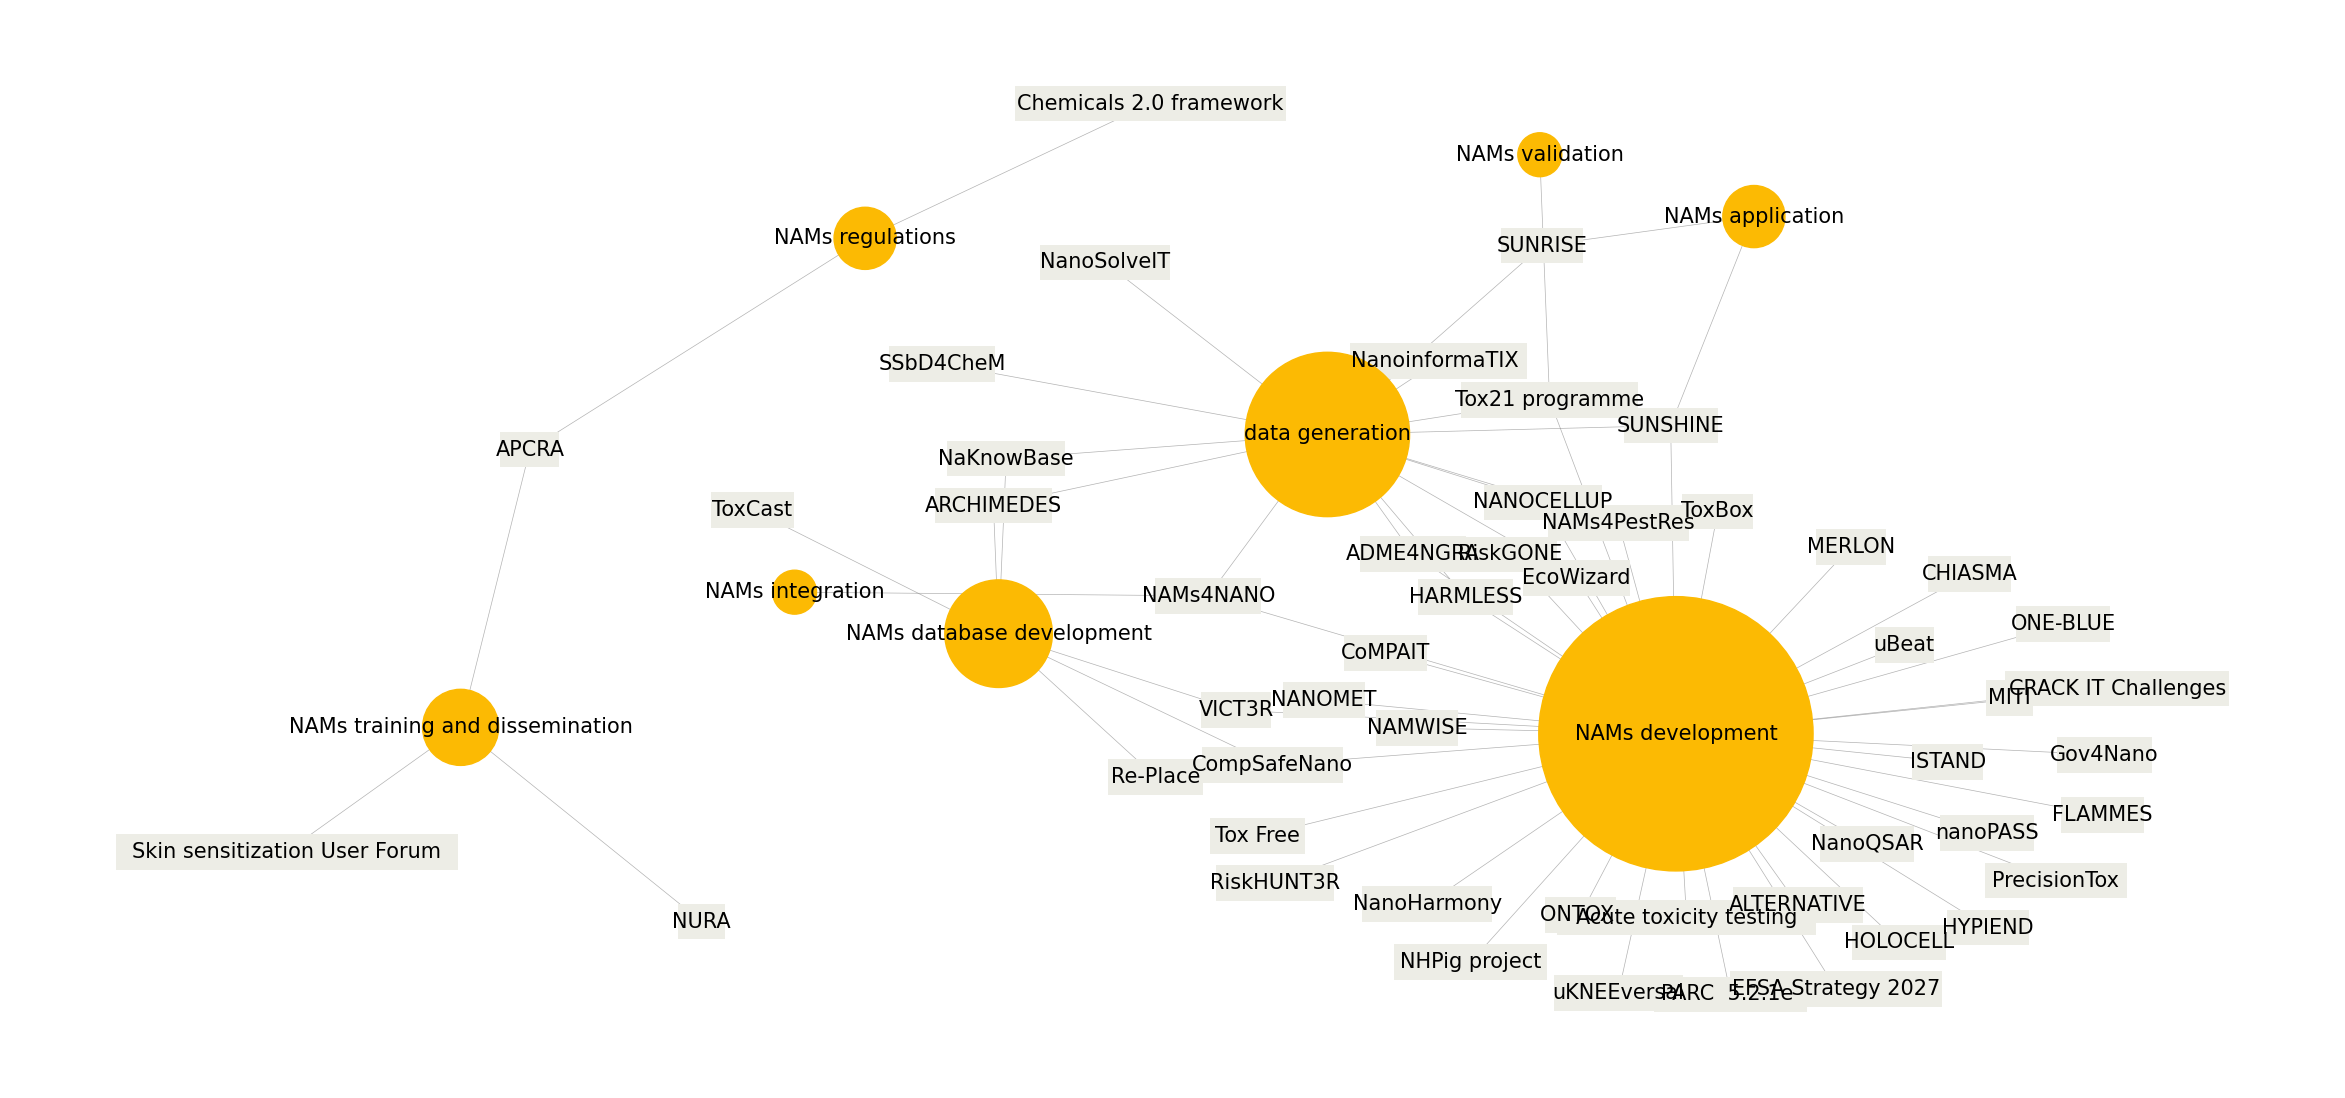

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Usuwanie wierszy z NaN w kolumnach 'Initiative' i 'General purpose'
df = df.dropna(subset=['Initiative', 'General purpose'])

# Tworzenie grafu
G = nx.Graph()

# Liczenie wystąpień celów (general purpose)
purpose_counts = {}

# Iteracja przez wiersze dataframe
for index, row in df.iterrows():
    funder = row['Initiative']
    general_purpose = row['General purpose']

    if isinstance(general_purpose, str):
        purposes = general_purpose.split(';')
        for purpose in purposes:
            purpose = purpose.strip()
            G.add_edge(funder, purpose)
            purpose_counts[purpose] = purpose_counts.get(purpose, 0) + 1
    else:
        print(f"Warning: 'General purpose' w wierszu {index} nie jest tekstem: {general_purpose}")

# Wizualizacja grafu
plt.figure(figsize=(30, 14))

# Ustawienie układu
pos = nx.spring_layout(G, k=0.65, iterations=100, seed=2)

# Określenie kształtów i właściwości węzłów
node_colors = []
node_sizes = []
rect_nodes = []  # Węzły prostokątne
circle_nodes = []  # Węzły okrągłe

for node in G.nodes():
    if node in df['Initiative'].values:
        rect_nodes.append(node)
    else:
        circle_nodes.append(node)

# Rysowanie krawędzi
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.6, edge_color='gray')

# Rysowanie okrągłych węzłów
nx.draw_networkx_nodes(G, pos, nodelist=circle_nodes, node_size=[purpose_counts.get(n, 1) * 1000 for n in circle_nodes], 
                       node_color='#fcba03', node_shape='o')

# Rysowanie prostokątnych węzłów z szerokością dopasowaną do długości etykiety i mniejszą wysokością
for node in rect_nodes:
    x, y = pos[node]
    label = str(node)
    width = len(label) * 10  # Szerokość zależna od długości etykiety
    height = 50  # Zmniejszona wysokość
    plt.gca().add_patch(plt.Rectangle((x - width / 2000, y - height / 2000), width / 1000, height / 1000,
                                      linewidth=1, facecolor='#edede6'))

# Rysowanie etykiet
nx.draw_networkx_labels(G, pos, font_size=15, font_color='black')

# Usuwanie ramki wykresu
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Usuwanie osi
plt.gca().xaxis.set_visible(False)
plt.gca().yaxis.set_visible(False)

plt.show()


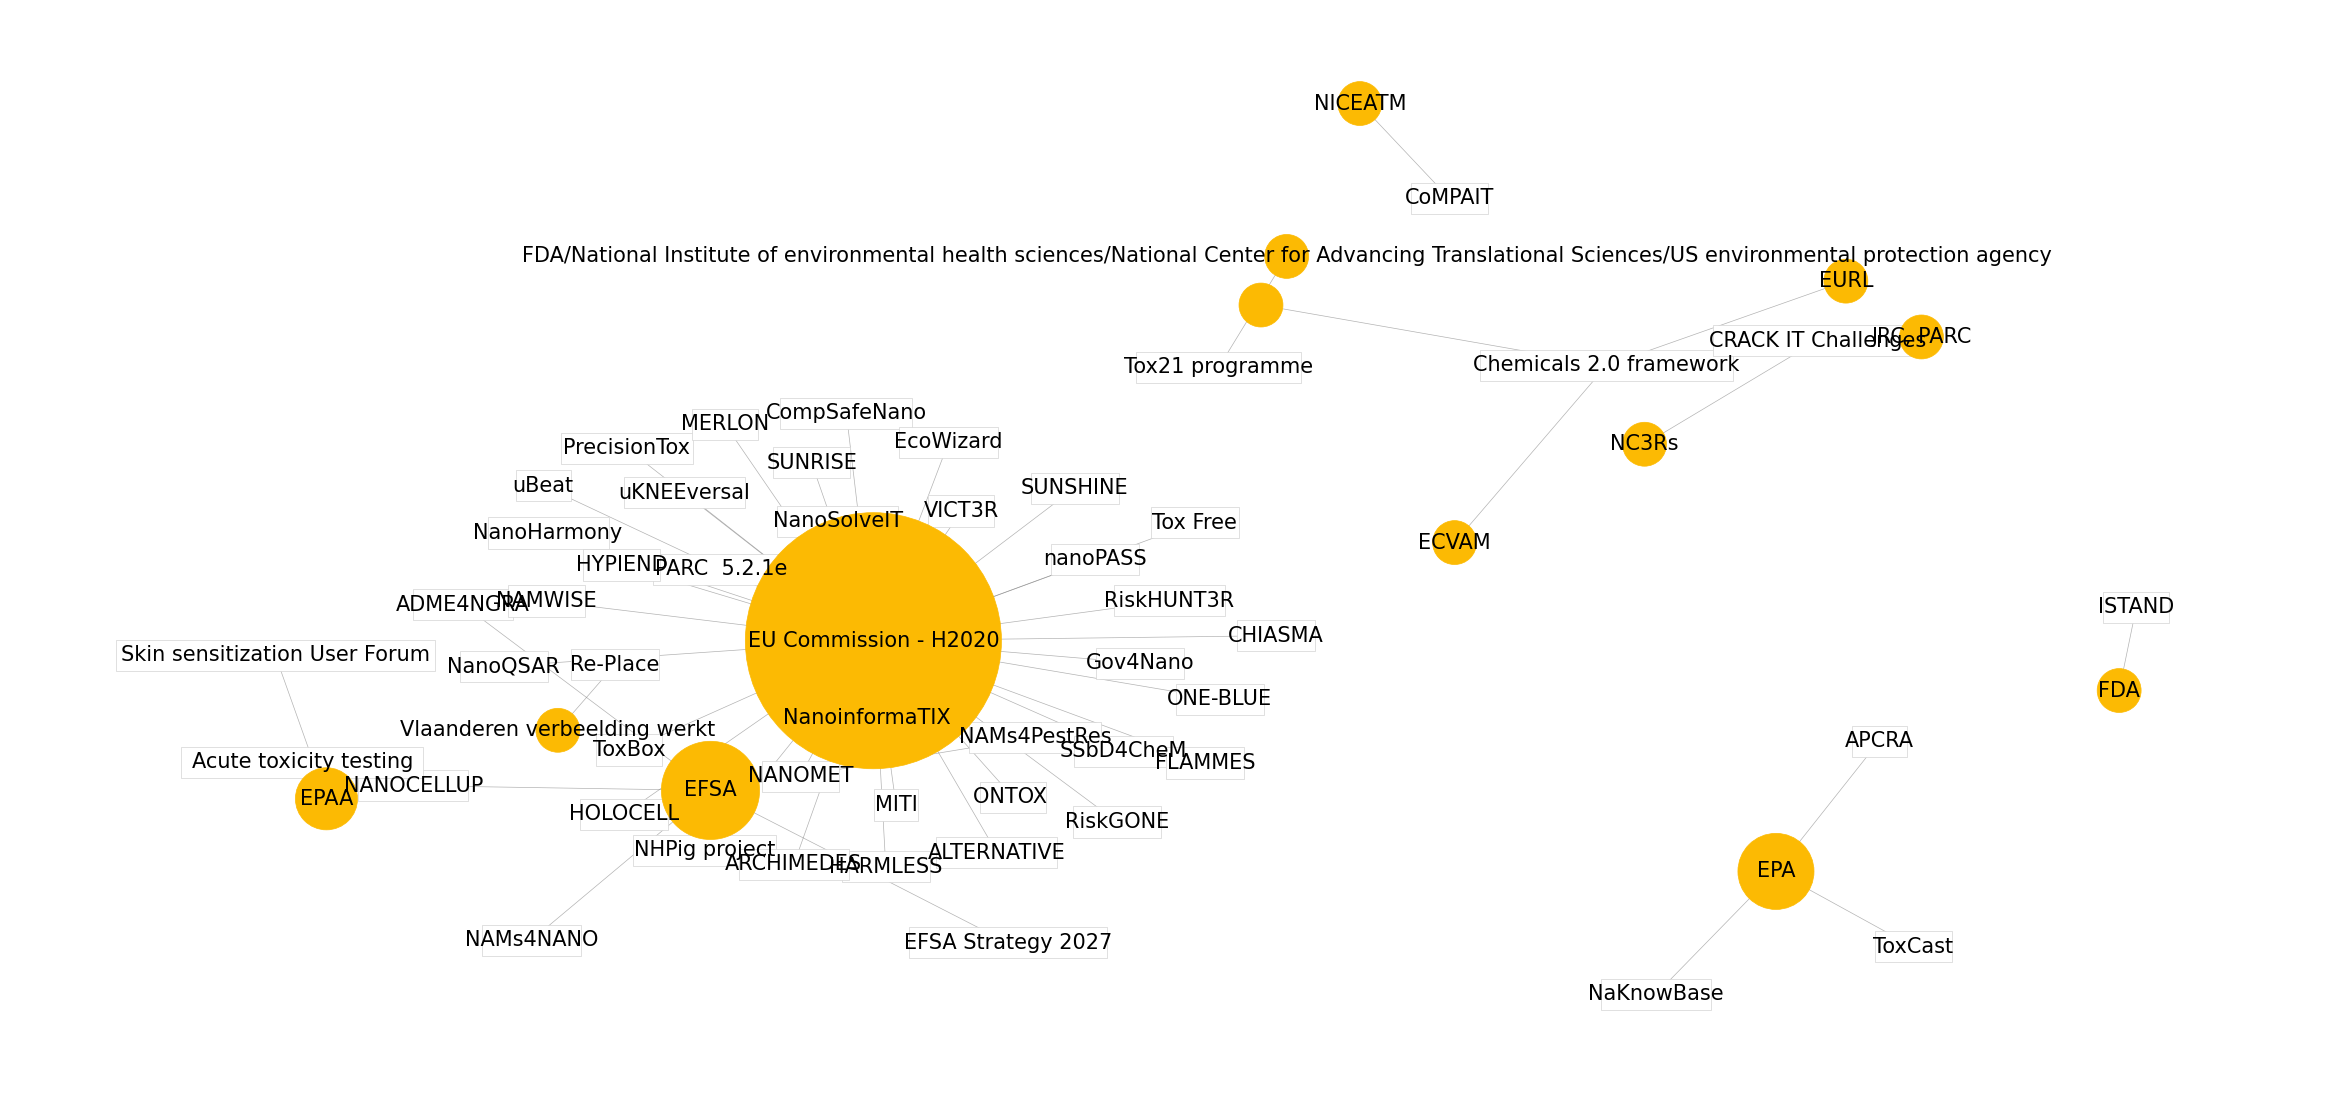

In [474]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Usuwanie wierszy z NaN w kolumnach 'Initiative' i 'General purpose'
df = df.dropna(subset=['Initiative', 'Funder'])

# Tworzenie grafu
G = nx.Graph()

# Liczenie wystąpień celów (general purpose)
purpose_counts = {}

# Iteracja przez wiersze dataframe
for index, row in df.iterrows():
    funder = row['Initiative']
    general_purpose = row['Funder']

    if isinstance(general_purpose, str):
        purposes = general_purpose.split(';')
        for purpose in purposes:
            purpose = purpose.strip()
            G.add_edge(funder, purpose)
            purpose_counts[purpose] = purpose_counts.get(purpose, 0) + 1
    else:
        print(f"Warning: 'General purpose' w wierszu {index} nie jest tekstem: {general_purpose}")

# Wizualizacja grafu
plt.figure(figsize=(30, 14))

# Ustawienie układu
pos = nx.spring_layout(G, k=0.7, iterations=100, seed=2)

# Określenie kształtów i właściwości węzłów
node_colors = []
node_sizes = []
rect_nodes = []  # Węzły prostokątne
circle_nodes = []  # Węzły okrągłe

for node in G.nodes():
    if node in df['Initiative'].values:
        rect_nodes.append(node)
    else:
        circle_nodes.append(node)

# Rysowanie krawędzi
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.6, edge_color='gray')

# Rysowanie okrągłych węzłów
nx.draw_networkx_nodes(G, pos, nodelist=circle_nodes, node_size=[purpose_counts.get(n, 1) * 1000 for n in circle_nodes], 
                       node_color='#fcba03', node_shape='o', linewidths=0.5)

# Rysowanie prostokątnych węzłów z obramowaniem
for node in rect_nodes:
    x, y = pos[node]
    label = str(node)
    width = len(label) * 10  # Szerokość zależna od długości etykiety
    height = 50  # Zmniejszona wysokość
    plt.gca().add_patch(plt.Rectangle((x - width / 2000, y - height / 2000), width / 1000, height / 1000,
                                      linewidth=0.5, edgecolor='lightgray', facecolor='#ffff'))

# Rysowanie etykiet
nx.draw_networkx_labels(G, pos, font_size=15, font_color='black')

# Usuwanie ramki wykresu
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Usuwanie osi
plt.gca().xaxis.set_visible(False)
plt.gca().yaxis.set_visible(False)

plt.show()


In [ ]:
df = pd.read_excel('/Users/alicjawojciechowska/Documents/GitHub/ECHA_2025_phase2/inventoryPHASE2.xlsx', sheet_name = 'NAMs under development')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_donut_scores(df, font_size_label=20, font_size_percentage=22, figsize=(14, 7)):
    """
    Tworzy wykresy typu donut dla kolumn 'S SCORE' i 'K SCORE' w podanym dataframe.
    
    Args:
        df (pd.DataFrame): DataFrame zawierający kolumny 'S SCORE' i 'K SCORE'.
        font_size_label (int, optional): Rozmiar czcionki dla etykiet kategorii. Domyślnie 20.
        font_size_percentage (int, optional): Rozmiar czcionki dla procentów. Domyślnie 22.
        figsize (tuple, optional): Rozmiar wykresu. Domyślnie (14, 7).
    """
    # Obliczanie liczności dla obu kolumn
    s_counts = df['Overlap with Phase 1 inventory (yes/no)'].value_counts()

    # Mapa kolorów
    color_map = {
        'S1': '#0b2854',  # Kolor dla S1
        'S2': '#adb5bd',  # Kolor dla S2
        # 'S3': '#dee2e6',  # Kolor dla S3
        # 'K1': '#0b2854',  # Kolor dla K1
        # 'K2': '#adb5bd',  # Kolor dla K2
        # 'K3': '#dee2e6',  # Kolor dla K3
    }

    # Ustawienie wykresów obok siebie
    fig, (ax2, ax1) = plt.subplots(1, 2, figsize=figsize)

    # Wykres donut dla S SCORE
    wedges1, _ = ax1.pie(
        s_counts, labels=None, autopct=None, startangle=90,
        colors=[color_map[label] for label in s_counts.index],
        wedgeprops={'width': 0.5, 'edgecolor': 'w'}
    )

    # Dodanie procentów i etykiet dla S SCORE
    for i, (w, pct) in enumerate(zip(wedges1, s_counts)):
        angle = (w.theta2 - w.theta1) / 2. + w.theta1
        x = np.cos(np.radians(angle))
        y = np.sin(np.radians(angle))
        ax1.text(
            x * 1.3, y * 1.1, f'{s_counts[i] / s_counts.sum() * 100:.1f}%',
            ha='center', va='center', fontsize=font_size_percentage, fontweight='bold', color='black'
        )
        ax1.text(
            x * 1.3, y * 1.4, s_counts.index[i],
            ha='center', va='center', fontsize=font_size_label, color='black'
        )

    # Wyświetlenie wykresów
    plt.tight_layout()
    plt.show()


/var/folders/2t/sz6zbhcs41sdvmgklwxf4q0w0000gn/T/ipykernel_22493/2414889899.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x * 1.3, y * 1.1, f'{s_counts[i] / s_counts.sum() * 100:.1f}%',


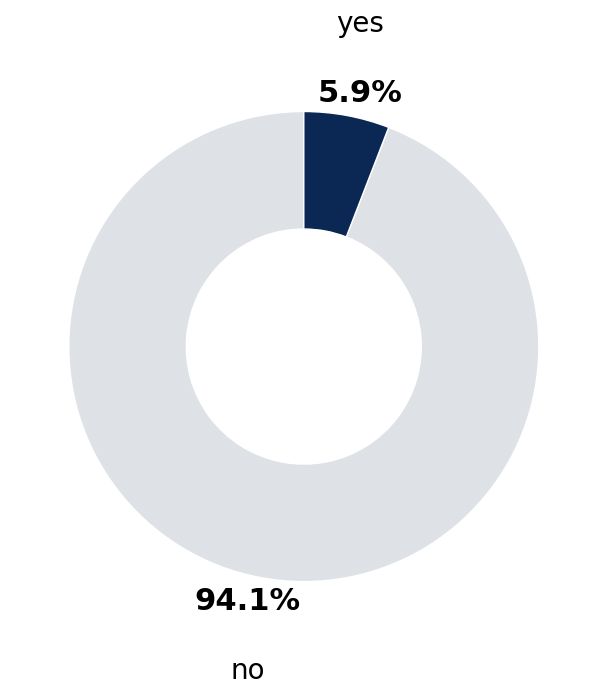

In [ ]:
plot_donut_scores(df)

In [ ]:
s_counts = df['Overlap with Phase 1 inventory (yes/no)'].value_counts()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_donut_scores(df, font_size_label=20, font_size_percentage=22, figsize=(7, 7)):
    """
    Tworzy wykres typu donut dla kolumny 'Overlap with Phase 1 inventory (yes/no)' w podanym dataframe.
    
    Args:
        df (pd.DataFrame): DataFrame zawierający kolumnę 'Overlap with Phase 1 inventory (yes/no)'.
        font_size_label (int, optional): Rozmiar czcionki dla etykiet kategorii. Domyślnie 20.
        font_size_percentage (int, optional): Rozmiar czcionki dla procentów. Domyślnie 22.
        figsize (tuple, optional): Rozmiar wykresu. Domyślnie (7, 7).
    """
    # Obliczanie liczności dla kolumny
    s_counts = df['Overlap with Phase 1 inventory (yes/no)'].value_counts()

    # Mapa kolorów dla wartości "yes" i "no"
    color_map = {
        'yes': '#0b2854',  # Kolor dla "yes" #0b2854
        'no': '#dee2e6',   # Kolor dla "no" #dee2e6
    }

    # Tworzenie wykresu
    fig, ax = plt.subplots(figsize=figsize)

    wedges, _ = ax.pie(
        s_counts, labels=None, autopct=None, startangle=90,
        colors=[color_map[label] for label in s_counts.index],
        wedgeprops={'width': 0.5, 'edgecolor': 'w'}
    )

    # Dodanie procentów i etykiet
    for i, (w, pct) in enumerate(zip(wedges, s_counts)):
        angle = (w.theta2 - w.theta1) / 2. + w.theta1
        x = np.cos(np.radians(angle))
        y = np.sin(np.radians(angle))
        ax.text(
            x * 1.3, y * 1.1, f'{s_counts[i] / s_counts.sum() * 100:.1f}%',
            ha='center', va='center', fontsize=font_size_percentage, fontweight='bold', color='black'
        )
        ax.text(
            x * 1.3, y * 1.4, s_counts.index[i],
            ha='center', va='center', fontsize=font_size_label, color='black'
        )

    # Wyświetlenie wykresu
    plt.tight_layout()
    plt.show()


In [ ]:
def remove_stopwords(text, stopwords_list):
    # Podział tekstu na słowa
    words = text.split()
    
    # Usuwanie stopwords
    text_without_stopwords = [word for word in words if word.lower() not in stopwords_list]
    
    # Łączenie słów z powrotem w tekst
    return ' '.join(text_without_stopwords)

# Przykład użycia
stopwords_list = ['this', 'is', 'an', 'that', 'the', 'of', 'and', 'a', 'to']  # Przykładowa lista stopwords
text = "This is an example text that contains stopwords."
print(remove_stopwords(text, stopwords_list))


example text contains stopwords.


In [ ]:
import pandas as pd

# Funkcja usuwająca stopwords
def remove_stopwords(text, stopwords_list):
    # Podział tekstu na słowa
    words = text.split()
    
    # Usuwanie stopwords
    text_without_stopwords = [word for word in words if word.lower() not in stopwords_list]
    
    # Łączenie słów z powrotem w tekst
    return ' '.join(text_without_stopwords)

# Rozbudowana lista stopwords (możesz dodać więcej słów według potrzeby)
stopwords_list = [
    'this', 'is', 'an', 'that', 'the', 'of', 'and', 'a', 'to', 'in', 'for', 'on', 'with', 'as', 
    'at', 'by', 'from', 'about', 'as', 'it', 'be', 'are', 'were', 'will', 'have', 'has', 'had', 
    'not', 'so', 'but', 'or', 'because', 'which', 'who', 'whom', 'whose', 'how', 'when', 'where',
    'i', 'you', 'he', 'she', 'we', 'they', 'all', 'any', 'some', 'there', 'here', 'can', 'could', 
    'would', 'should', 'just', 'don', 'does', 'did', 'each', 'more', 'less', 'both', 'either', 
    'neither', 'all', 'much', 'many', 'few', 'more', 'less', 'very', 'really', 'quite', 'too', 
    'rather', 'whether', 'though', 'although', 'since', 'until'
]

# Wczytanie DataFrame (przykład)
data = {'text_column': [
    "This is a sample sentence with some stopwords.",
    "Another example text for testing stopword removal.",
    "Text without stopwords should be much clearer.",
    "The quick brown fox jumps over the lazy dog."
]}

df = pd.DataFrame(data)

# Zastosowanie funkcji remove_stopwords do kolumny 'text_column'
df['cleaned_text'] = df['text_column'].apply(lambda x: remove_stopwords(x, stopwords_list))

# Wyświetlenie wyników
print(df[['text_column', 'cleaned_text']])

                                         text_column  \
0     This is a sample sentence with some stopwords.   
1  Another example text for testing stopword remo...   
2     Text without stopwords should be much clearer.   
3       The quick brown fox jumps over the lazy dog.   

                                     cleaned_text  
0                      sample sentence stopwords.  
1  Another example text testing stopword removal.  
2                 Text without stopwords clearer.  
3            quick brown fox jumps over lazy dog.  


In [ ]:
df = pd.read_excel('/Users/alicjawojciechowska/Documents/GitHub/ECHA_2025_phase2/inventoryPHASE2.xlsx', sheet_name = 'NAMs under development')

In [ ]:
# Zastosowanie funkcji remove_stopwords do kolumny 'text_column'
df['cleaned_text'] = df['Intended purpose'].apply(lambda x: remove_stopwords(x, stopwords_list))

# Wyświetlenie wyników
print(df[['Intended purpose', 'cleaned_text']])

                                      Intended purpose  \
0    Evaluation of the nanopraticle size and size d...   
1                     Physicochemical characterization   
2                     Physicochemical characterization   
3                     Physicochemical characterization   
4                     Physicochemical characterization   
..                                                 ...   
148  The test is designed to (i) predict fish acute...   
149  Detect endocrine active chemicals acting as ag...   
150   To detect chemicals active on the androgen axis.   
151  To measure the response of eleutheroembryos to...   
152  To detect the potential of chemicals with jh a...   

                                          cleaned_text  
0       Evaluation nanopraticle size size distribution  
1                     Physicochemical characterization  
2                     Physicochemical characterization  
3                     Physicochemical characterization  
4                 

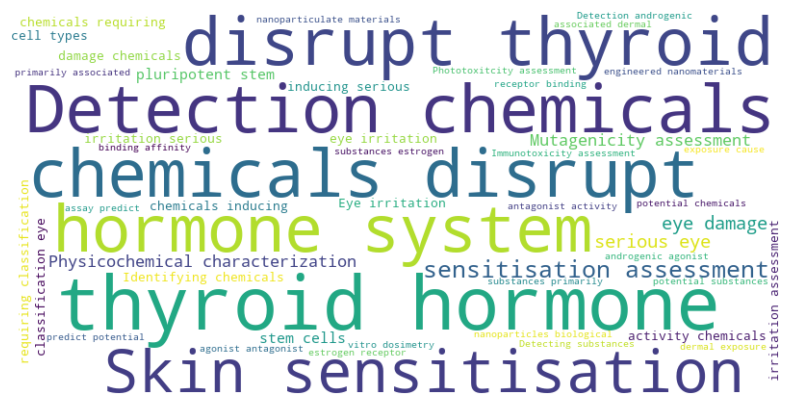

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Funkcja do generowania bigramów
def generate_bigrams(text):
    words = text.split()  # Podziel tekst na słowa
    bigrams = [' '.join([words[i], words[i+1]]) for i in range(len(words)-1)]  # Tworzymy bigramy
    return bigrams

# Połącz wszystkie bigramy w jeden ciąg
all_bigrams = []
for text in df['cleaned_text']:
    all_bigrams.extend(generate_bigrams(text))  # Generujemy bigramy dla każdego tekstu

# Zliczamy częstotliwość wystąpień bigramów
bigram_freq = Counter(all_bigrams)

# Ograniczamy liczbę bigramów (np. tylko 50 najczęściej występujących)
most_common_bigrams = dict(bigram_freq.most_common(50))

# Tworzymy chmurę słów z wybranych bigramów
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(most_common_bigrams)

# Wyświetlamy chmurę słów
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Wyłącz osie
plt.show()

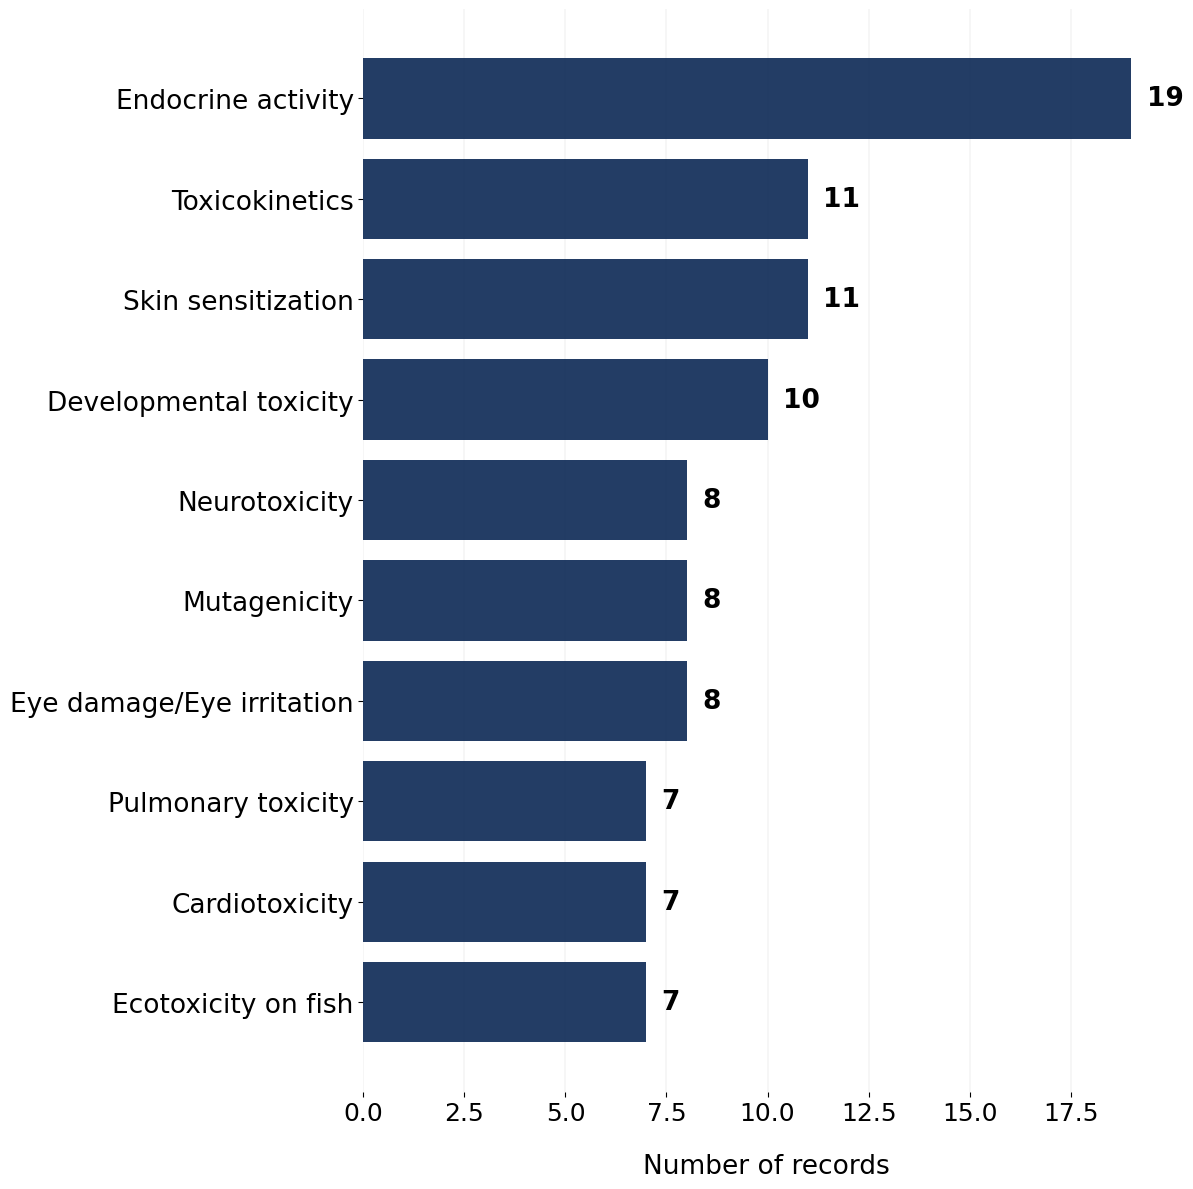

In [504]:
import pandas as pd
import matplotlib.pyplot as plt

# Wczytaj dane z pliku Excel
df = pd.read_excel('/Users/alicjawojciechowska/Documents/GitHub/ECHA_2025_phase2/inventory_PHASE2_9042025_v3 (1).xlsx', 
                   sheet_name='NAMs under development')

# Rozdzielenie wartości w kolumnie SIRS i eksplodowanie ich
df_exploded = df.assign(SIRS=df['Standard Information Requirements (SIRs) / Specific Target Organ Toxicity (STOT)']
                        .str.split(';')).explode('SIRS')
df_exploded['SIRS'] = df_exploded['SIRS'].str.strip()  # Usunięcie zbędnych spacji

# Zliczenie wartości w kolumnie SIRS
sirs_counts = df_exploded['SIRS'].value_counts()

# Wybór 10 najczęstszych wartości
top_10_sirs = sirs_counts.head(10)

# Przygotowanie kolorów
unique_color = '#0b2854'  # Granatowy dla słupków

# Tworzenie wykresu
fig, ax = plt.subplots(figsize=(12, 12))  # Zwiększenie wielkości wykresu
x = range(len(top_10_sirs))

# Słupki dla 10 najczęstszych wartości SIRS
unique_bars = ax.barh(x, top_10_sirs, color=unique_color, alpha=0.9, zorder=3)

# Dodawanie liczebności na słupkach (na końcu słupków)
for i, value in enumerate(top_10_sirs):
    ax.text(value + max(top_10_sirs) * 0.02, i, str(value), va='center', ha='left', 
            fontsize=19, fontweight='bold', color='black')

# Odwrócenie osi Y
ax.invert_yaxis()

# Stylizacja osi
ax.set_yticks(x)
ax.set_yticklabels(top_10_sirs.index, fontsize=19)  # Powiększenie czcionki etykiet osi Y
ax.set_xlabel("Number of records", fontsize=19, labelpad=20)  # Powiększenie czcionki podpisu osi X

# Powiększenie czcionki liczbowych etykiet osi X
ax.tick_params(axis='x', labelsize=18)  # Powiększenie czcionki etykiet na osi X

# Usuwanie ramek
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Siatka
ax.grid(True, axis='x', color='gray', linestyle='-', linewidth=0.1, zorder=0)

# Wyświetlenie wykresu
plt.tight_layout()
plt.show()


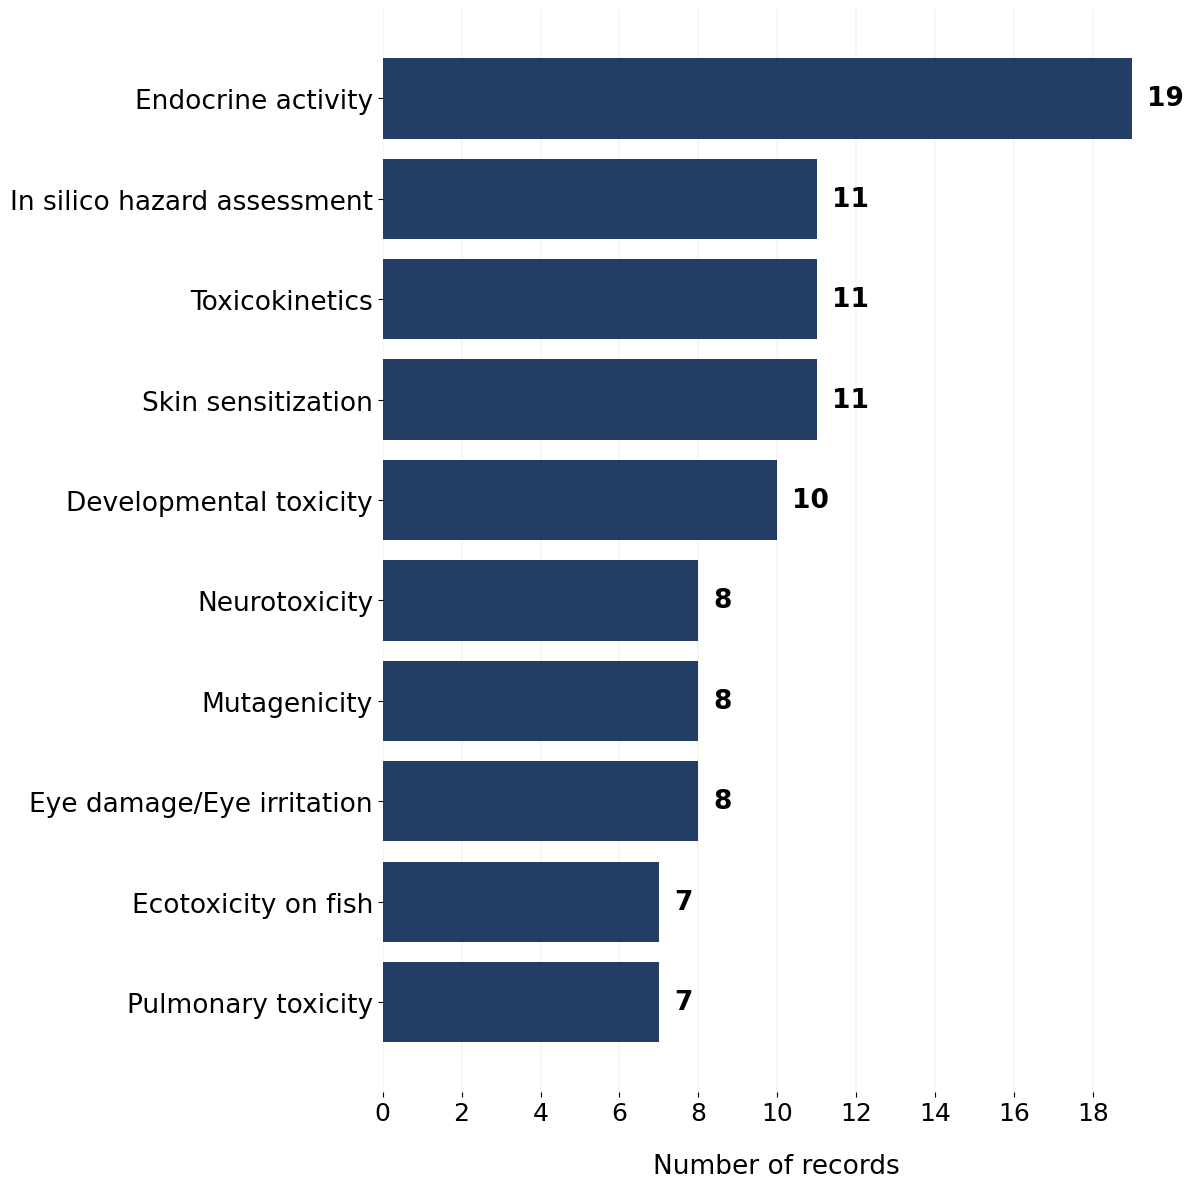

In [508]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator  # Import do ustawienia liczby całkowitej na osi

# Wczytaj dane z pliku Excel
df = pd.read_excel('/Users/alicjawojciechowska/Documents/GitHub/ECHA_2025_phase2/inventory_PHASE2_9042025_v3 (3).xlsx', 
                   sheet_name='NAMs under development')

# Rozdzielenie wartości w kolumnie SIRS i eksplodowanie ich
df_exploded = df.assign(SIRS=df['Standard Information Requirements (SIRs) / Specific Target Organ Toxicity (STOT)']
                        .str.split(';')).explode('SIRS')
df_exploded['SIRS'] = df_exploded['SIRS'].str.strip()  # Usunięcie zbędnych spacji

# Zliczenie wartości w kolumnie SIRS
sirs_counts = df_exploded['SIRS'].value_counts()

# Wybór 10 najczęstszych wartości
top_10_sirs = sirs_counts.head(10)

# Przygotowanie kolorów
unique_color = '#0b2854'  # Granatowy dla słupków

# Tworzenie wykresu
fig, ax = plt.subplots(figsize=(12, 12))  # Zwiększenie wielkości wykresu
x = range(len(top_10_sirs))

# Słupki dla 10 najczęstszych wartości SIRS
unique_bars = ax.barh(x, top_10_sirs, color=unique_color, alpha=0.9, zorder=3)

# Dodawanie liczebności na słupkach (na końcu słupków)
for i, value in enumerate(top_10_sirs):
    ax.text(value + max(top_10_sirs) * 0.02, i, str(value), va='center', ha='left', 
            fontsize=19, fontweight='bold', color='black')

# Odwrócenie osi Y
ax.invert_yaxis()

# Stylizacja osi
ax.set_yticks(x)
ax.set_yticklabels(top_10_sirs.index, fontsize=19)  # Powiększenie czcionki etykiet osi Y
ax.set_xlabel("Number of records", fontsize=19, labelpad=20)  # Powiększenie czcionki podpisu osi X

# Powiększenie czcionki liczbowych etykiet osi X
ax.tick_params(axis='x', labelsize=18)  # Powiększenie czcionki etykiet na osi X

# Ustawienie osi X na liczby całkowite
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

# Usuwanie ramek
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Siatka
ax.grid(True, axis='x', color='gray', linestyle='-', linewidth=0.1, zorder=0)

# Wyświetlenie wykresu
plt.tight_layout()
plt.show()


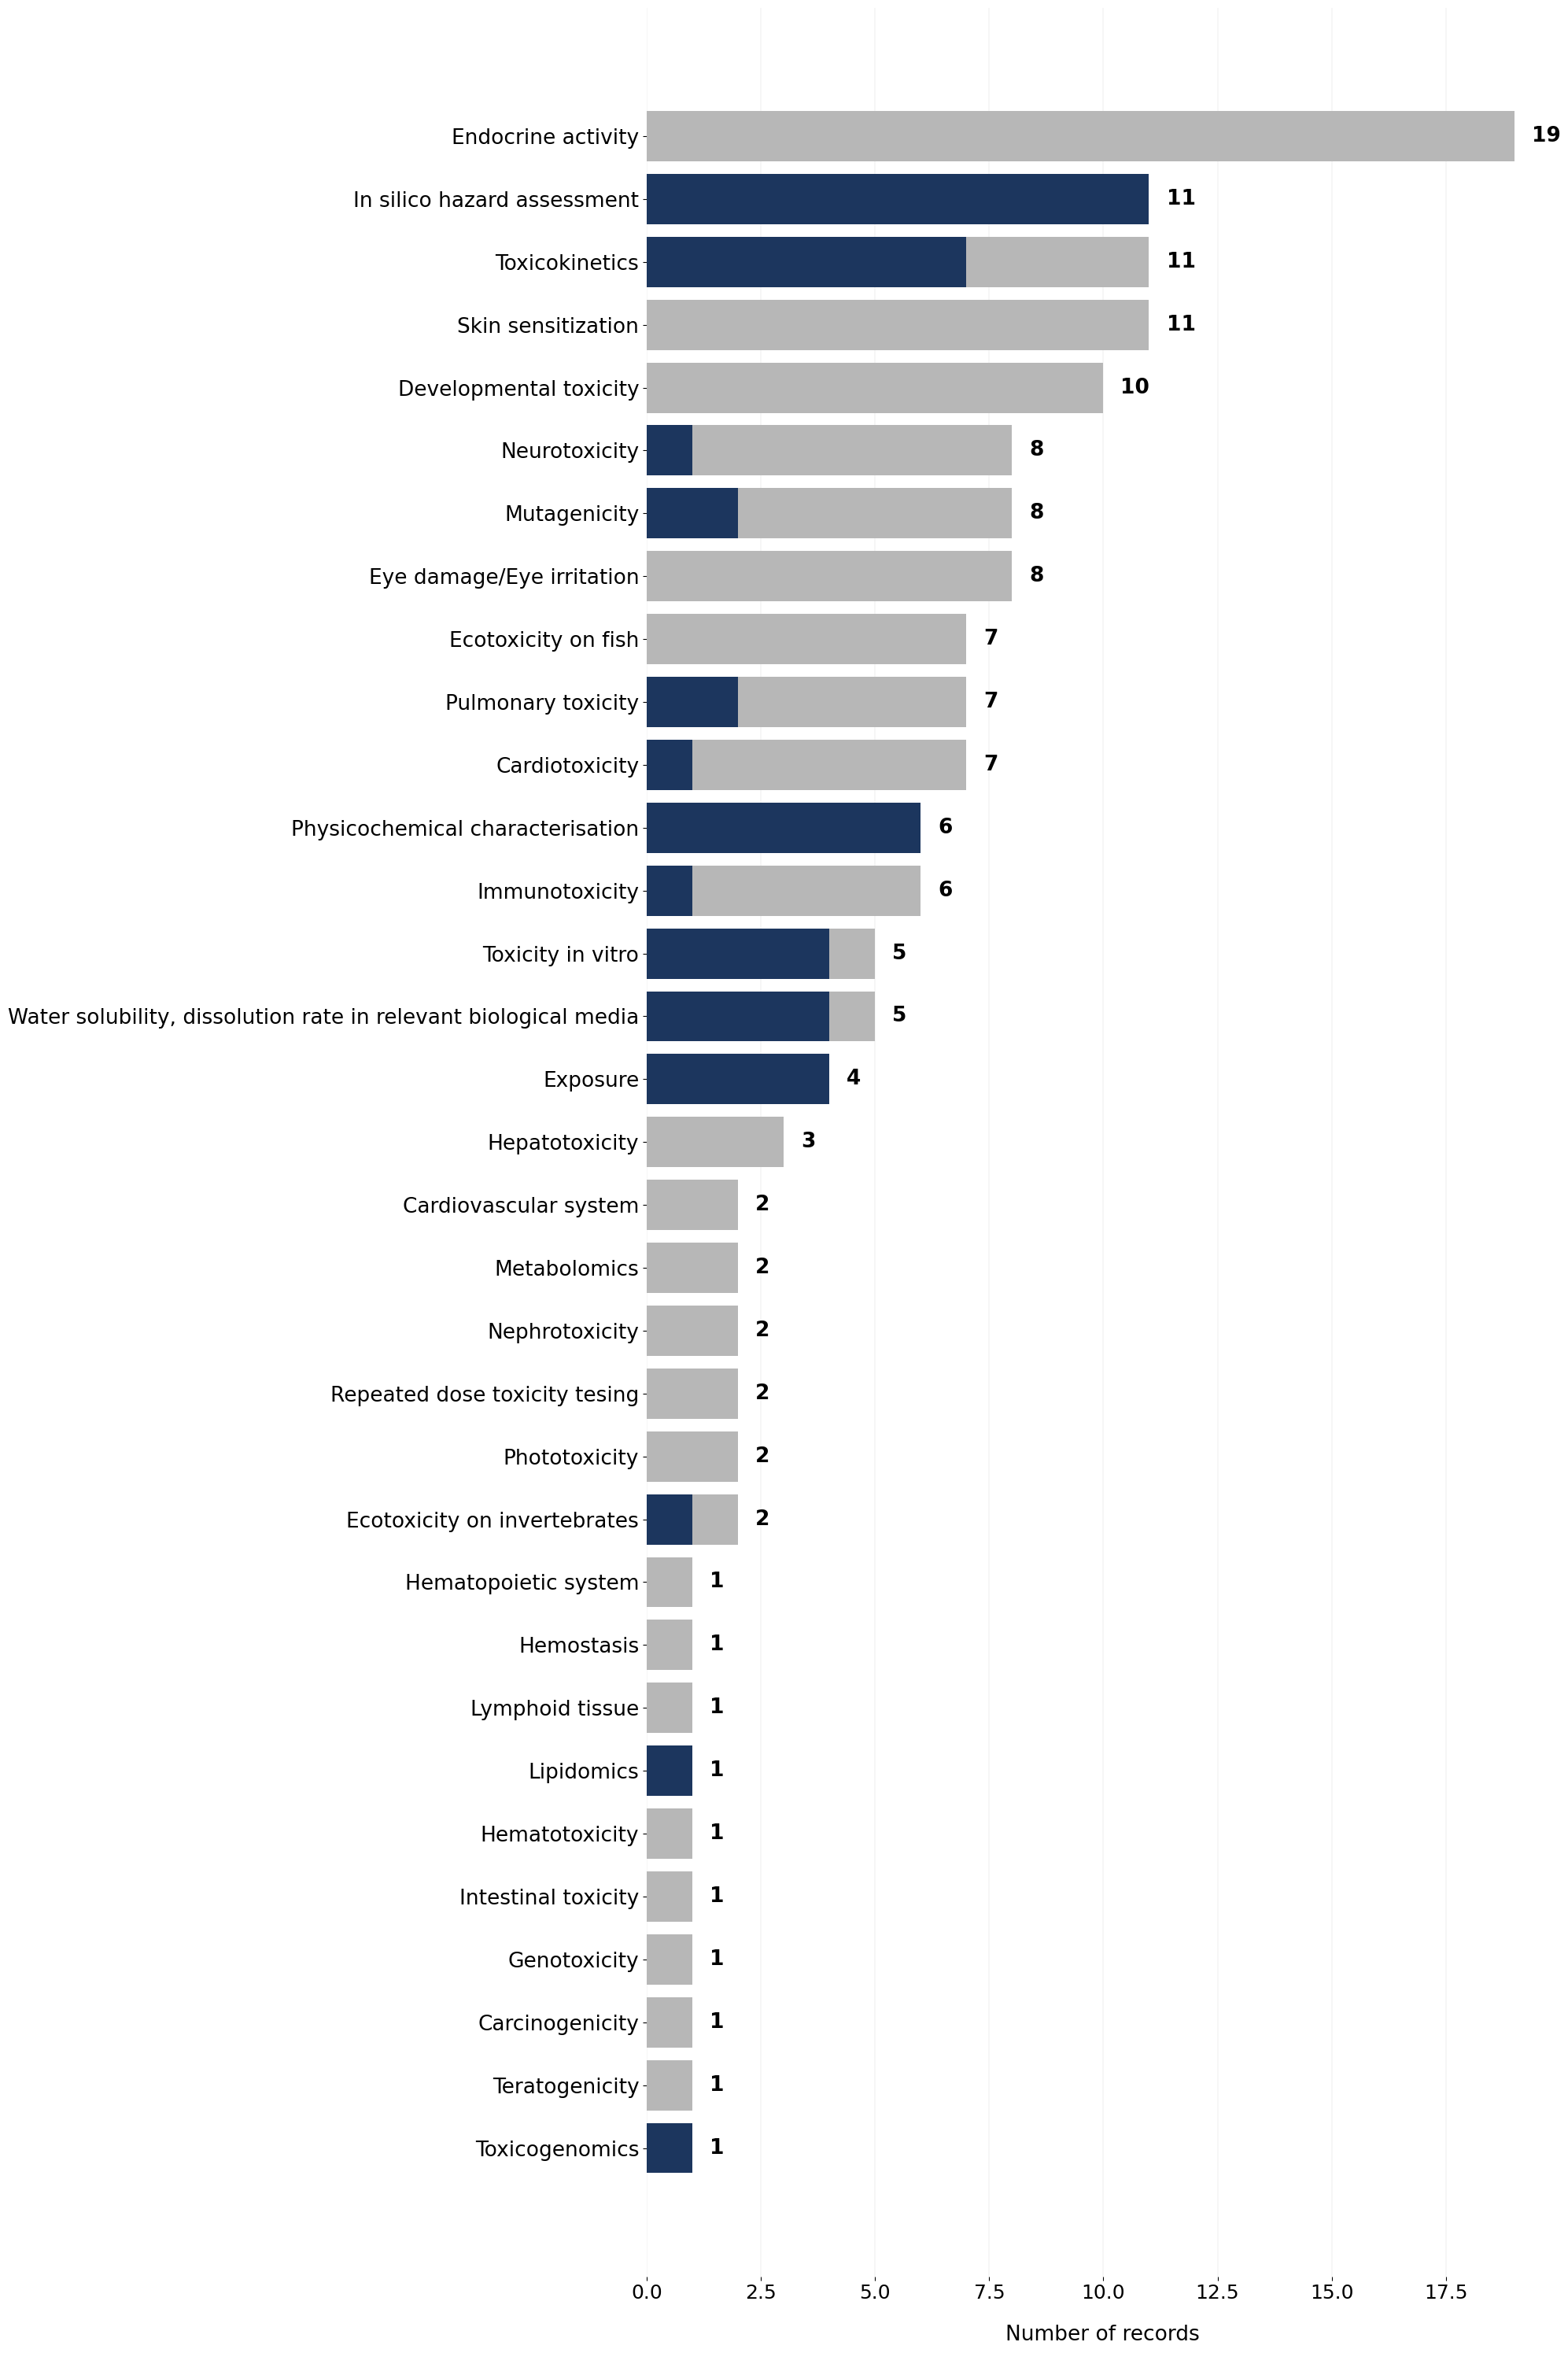

In [509]:
# Rozdzielanie wartości w kolumnie SIRS oddzielonych średnikiem
df_exploded = df.assign(SIRS=df['Standard Information Requirements (SIRs) / Specific Target Organ Toxicity (STOT)'].str.split(';')).explode('SIRS')
df_exploded['SIRS'] = df_exploded['SIRS'].str.strip()  # Usunięcie zbędnych spacji

# Podzbiór danych, gdzie wartości w kolumnie X różnią się od "no"
subset_df_exploded = df_exploded[df_exploded['Nanomaterials used'] != 'no']

# Zliczanie wartości w kolumnie SIRS dla pełnego zbioru i podzbioru
sirs_counts_full = df_exploded['SIRS'].value_counts()
sirs_counts_subset = subset_df_exploded['SIRS'].value_counts()

# Przygotowanie 10 najczęstszych wartości
top_10_sirs_full = sirs_counts_full.head(40)
top_10_sirs_subset = sirs_counts_subset.reindex(top_10_sirs_full.index).fillna(0)

# Przygotowanie kolorów
full_color = '#b0b0b0'  # Szary dla pełnego zbioru
subset_color = '#0b2854'  # Granatowy dla podzbioru

# Tworzenie wykresu
fig, ax = plt.subplots(figsize=(20, 30))
x = range(len(top_10_sirs_full))

# Słupki dla pełnego zbioru danych (szare)
full_bars = ax.barh(x, top_10_sirs_full, color=full_color, alpha=0.9, zorder=2)

# Słupki dla ograniczonego podzbioru danych (granatowe)
subset_bars = ax.barh(x, top_10_sirs_subset, color=subset_color, alpha=0.9, zorder=3)

# Dodawanie liczebności na słupkach (dla pełnego zbioru)
for i, value in enumerate(top_10_sirs_full):
    ax.text(value + max(top_10_sirs_full) * 0.02, i, str(int(value)), va='center', ha='left', fontsize=19, fontweight='bold', color='black')

# Odwrócenie osi Y
ax.invert_yaxis()

# Stylizacja osi
ax.set_yticks(x)
ax.set_yticklabels(top_10_sirs_full.index, fontsize=19)
ax.set_xlabel("Number of records", fontsize=19, labelpad=20)

# Powiększenie czcionki liczbowych etykiet osi X
ax.tick_params(axis='x', labelsize=18)

# Usuwanie ramek
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Siatka
ax.grid(True, axis='x', color='gray', linestyle='-', linewidth=0.1, zorder=0)

# Legenda
#ax.legend(["Full dataset", "Subset (X ≠ 'no')"], fontsize=19, loc='lower right')

# Wyświetlenie wykresu
plt.tight_layout()
plt.show()

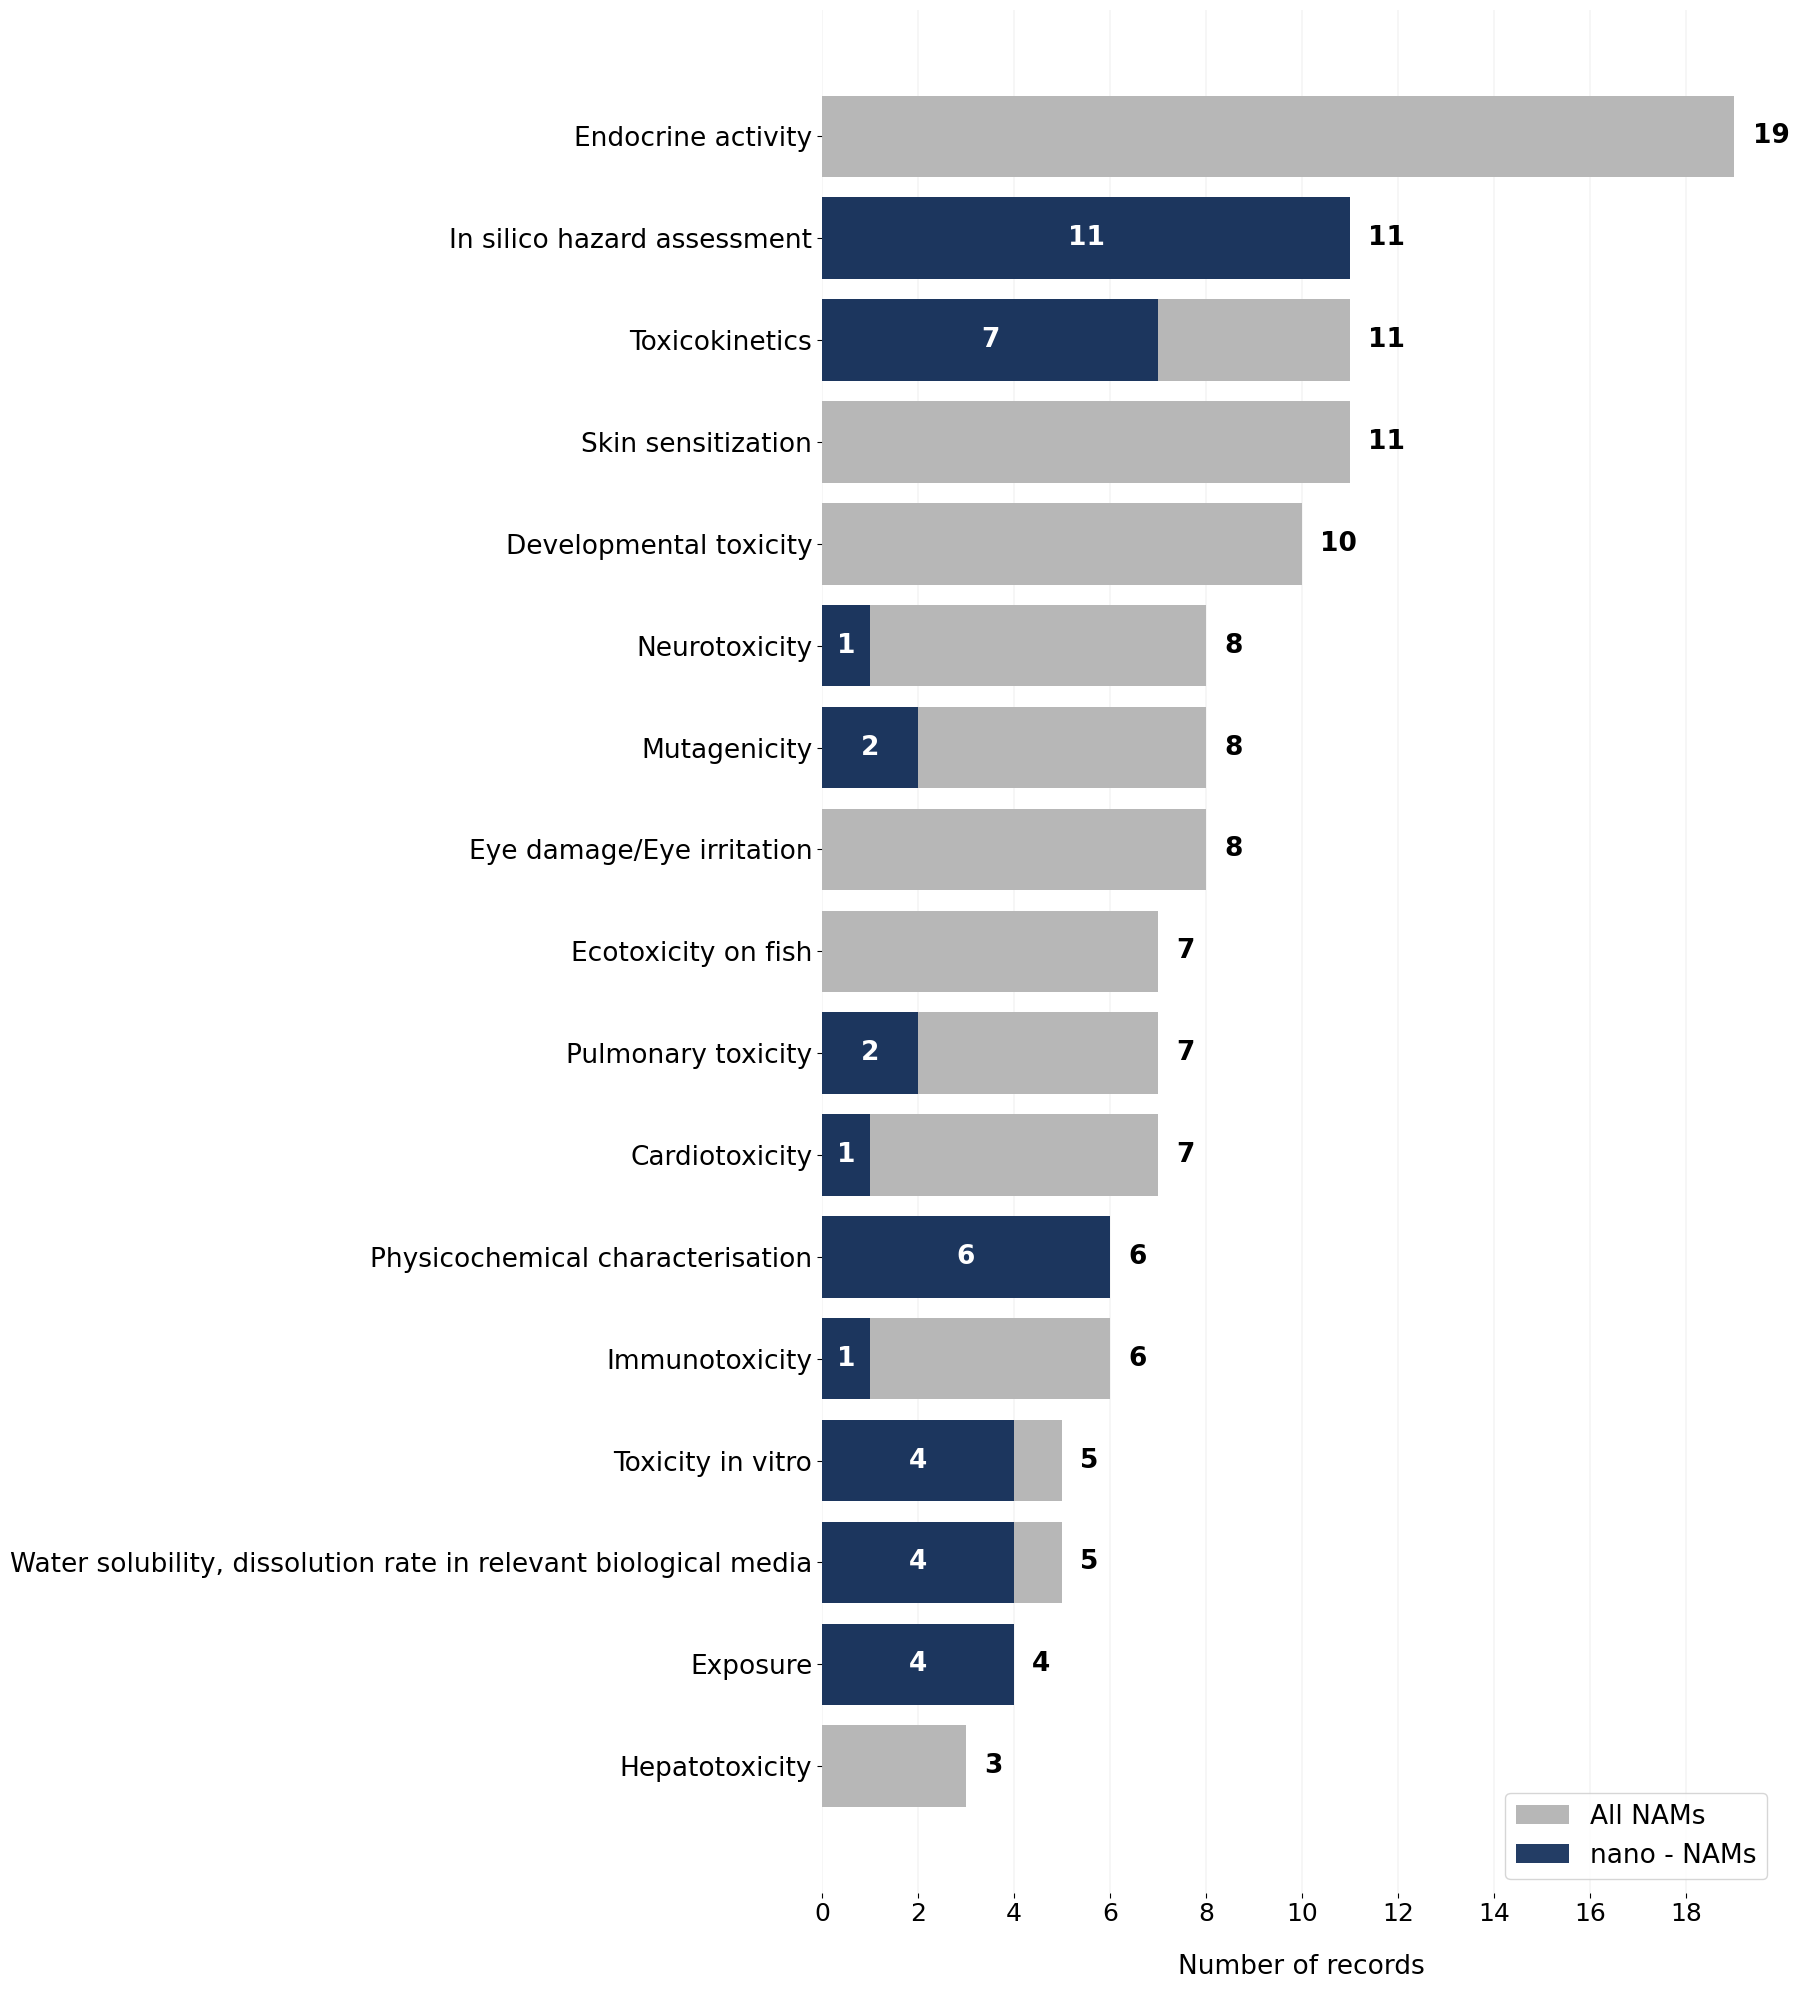

In [518]:
# Rozdzielanie wartości w kolumnie SIRS oddzielonych średnikiem
df_exploded = df.assign(SIRS=df['Standard Information Requirements (SIRs) / Specific Target Organ Toxicity (STOT)'].str.split(';')).explode('SIRS')
df_exploded['SIRS'] = df_exploded['SIRS'].str.strip()  # Usunięcie zbędnych spacji

# Podzbiór danych, gdzie wartości w kolumnie X różnią się od "no"
subset_df_exploded = df_exploded[df_exploded['Nanomaterials used'] != 'no']

# Zliczanie wartości w kolumnie SIRS dla pełnego zbioru i podzbioru
sirs_counts_full = df_exploded['SIRS'].value_counts()
sirs_counts_subset = subset_df_exploded['SIRS'].value_counts()

# Przygotowanie 10 najczęstszych wartości
top_10_sirs_full = sirs_counts_full.head(17)
top_10_sirs_subset = sirs_counts_subset.reindex(top_10_sirs_full.index).fillna(0)

# Przygotowanie kolorów
full_color = '#b0b0b0'  # Szary dla pełnego zbioru
subset_color = '#0b2854'  # Granatowy dla podzbioru

# Tworzenie wykresu
fig, ax = plt.subplots(figsize=(18, 20))
x = range(len(top_10_sirs_full))

# Słupki dla pełnego zbioru danych (szare)
full_bars = ax.barh(x, top_10_sirs_full, color=full_color, alpha=0.9, zorder=2)

# Słupki dla ograniczonego podzbioru danych (granatowe)
subset_bars = ax.barh(x, top_10_sirs_subset, color=subset_color, alpha=0.9, zorder=3)

# Dodawanie liczebności na słupkach (dla granatowych słupków podzbioru)
for i, value in enumerate(top_10_sirs_subset):
    if value > 0:  # Dodaj etykietę tylko, jeśli liczba jest większa od 0
        ax.text(
            value / 2,  # Pozycja X: połowa długości słupka
            i,          # Pozycja Y: środek słupka
            str(int(value)),  # Tekst: liczebność
            va='center', ha='center',  # Wyrównanie do środka
            fontsize=19, fontweight='bold', color='white'  # Biała czcionka
        )

# Dodawanie liczebności na słupkach (dla pełnego zbioru)
for i, value in enumerate(top_10_sirs_full):
    ax.text(value + max(top_10_sirs_full) * 0.02, i, str(int(value)), va='center', ha='left', fontsize=19, fontweight='bold', color='black')

# Odwrócenie osi Y
ax.invert_yaxis()

from matplotlib.ticker import MaxNLocator

# Stylizacja osi: ustawienie skali na liczby całkowite
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

# Stylizacja osi
ax.set_yticks(x)
ax.set_yticklabels(top_10_sirs_full.index, fontsize=19)
ax.set_xlabel("Number of records", fontsize=19, labelpad=20)

# Powiększenie czcionki liczbowych etykiet osi X
ax.tick_params(axis='x', labelsize=18)

# Usuwanie ramek
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Siatka
ax.grid(True, axis='x', color='gray', linestyle='-', linewidth=0.1, zorder=0)

# Legenda
ax.legend(["All NAMs", "nano - NAMs"], fontsize=19, loc='lower right')

# Wyświetlenie wykresu
plt.tight_layout()
plt.show()

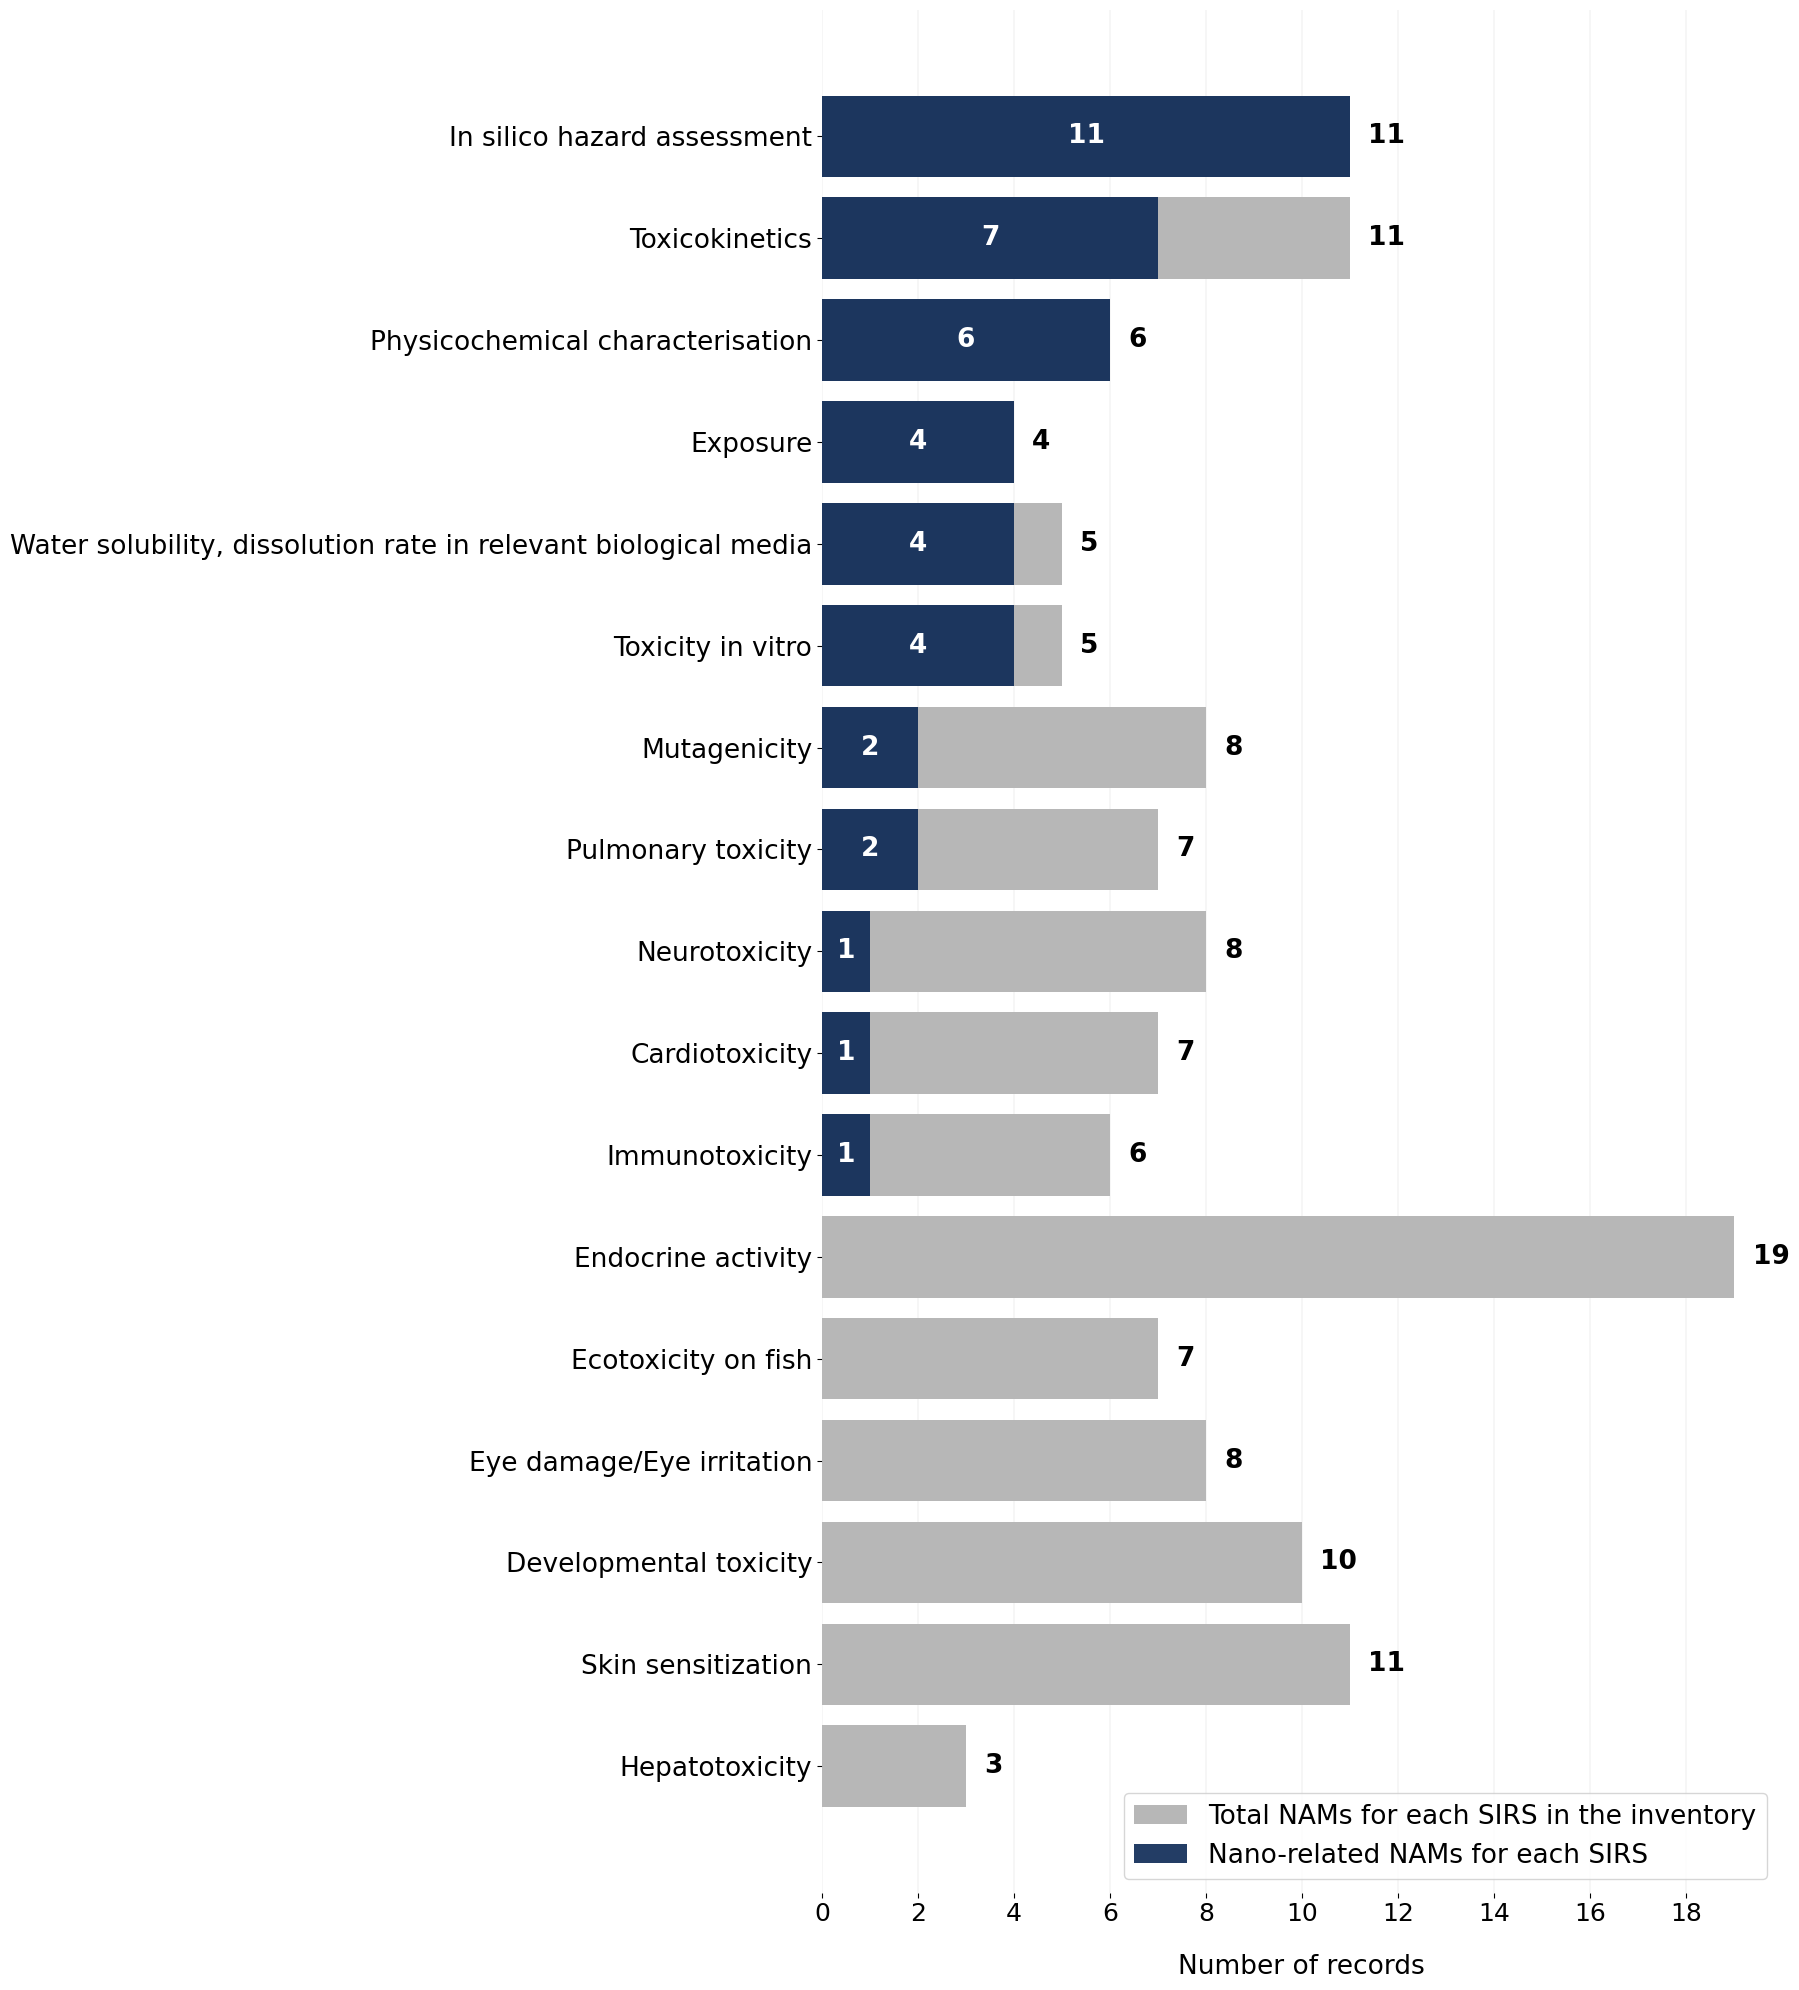

In [521]:
# Sortowanie indeksów względem wartości granatowych słupków
sorted_indices = top_10_sirs_subset.sort_values(ascending=False).index

# Uporządkowanie danych na podstawie posortowanych indeksów
top_10_sirs_full = top_10_sirs_full.reindex(sorted_indices)
top_10_sirs_subset = top_10_sirs_subset.reindex(sorted_indices)

# Tworzenie wykresu
fig, ax = plt.subplots(figsize=(18, 20))
x = range(len(top_10_sirs_full))

# Słupki dla pełnego zbioru danych (szare)
full_bars = ax.barh(x, top_10_sirs_full, color=full_color, alpha=0.9, zorder=2)

# Słupki dla ograniczonego podzbioru danych (granatowe)
subset_bars = ax.barh(x, top_10_sirs_subset, color=subset_color, alpha=0.9, zorder=3)

# Dodawanie liczebności na słupkach (dla granatowych słupków podzbioru)
for i, value in enumerate(top_10_sirs_subset):
    if value > 0:  # Dodaj etykietę tylko, jeśli liczba jest większa od 0
        ax.text(
            value / 2,  # Pozycja X: połowa długości słupka
            i,          # Pozycja Y: środek słupka
            str(int(value)),  # Tekst: liczebność
            va='center', ha='center',  # Wyrównanie do środka
            fontsize=19, fontweight='bold', color='white'  # Biała czcionka
        )

# Dodawanie liczebności na słupkach (dla pełnego zbioru)
for i, value in enumerate(top_10_sirs_full):
    ax.text(value + max(top_10_sirs_full) * 0.02, i, str(int(value)), va='center', ha='left', fontsize=19, fontweight='bold', color='black')

# Odwrócenie osi Y
ax.invert_yaxis()

# Stylizacja osi
ax.set_yticks(x)
ax.set_yticklabels(top_10_sirs_full.index, fontsize=19)
ax.set_xlabel("Number of records", fontsize=19, labelpad=20)

# Powiększenie czcionki liczbowych etykiet osi X
ax.tick_params(axis='x', labelsize=18)

# Usuwanie ramek
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Siatka
ax.grid(True, axis='x', color='gray', linestyle='-', linewidth=0.1, zorder=0)

# Ustawienie skali liczb całkowitych na osi X
from matplotlib.ticker import MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

# Legenda
ax.legend(["Total NAMs for each SIRS in the inventory", "Nano-related NAMs for each SIRS"], fontsize=19, loc='lower right')

# Wyświetlenie wykresu
plt.tight_layout()
plt.show()

In [517]:
from matplotlib.ticker import MaxNLocator

# Stylizacja osi: ustawienie skali na liczby całkowite
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

# Reszta kodu bez zmian
ax.set_yticks(x)
ax.set_yticklabels(top_10_sirs_full.index, fontsize=19)
ax.set_xlabel("Number of records", fontsize=19, labelpad=20)

# Powiększenie czcionki liczbowych etykiet osi X
ax.tick_params(axis='x', labelsize=18)

# Usuwanie ramek
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Siatka
ax.grid(True, axis='x', color='gray', linestyle='-', linewidth=0.1, zorder=0)

# Legenda
ax.legend(["All NAMs", "nano - NAMs"], fontsize=19, loc='lower right')

# Wyświetlenie wykresu
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

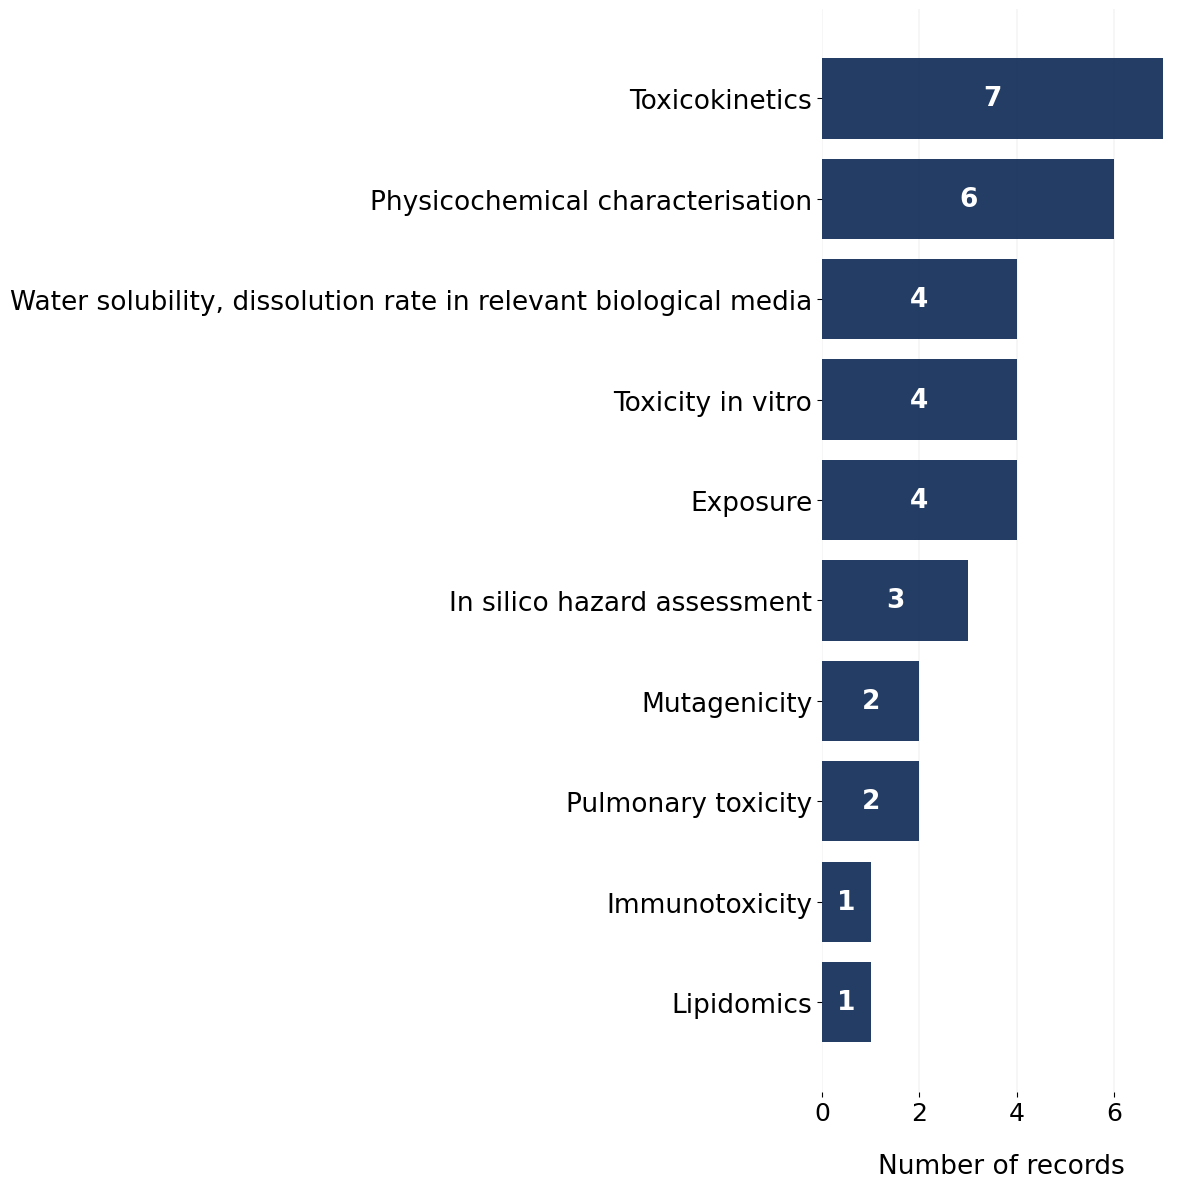

In [485]:
# Rozdzielanie wartości w kolumnie SIRS oddzielonych średnikiem
df_exploded = df.assign(SIRS=df['Standard Information Requirements (SIRs) / Specific Target Organ Toxicity (STOT)'].str.split(';')).explode('SIRS')
df_exploded['SIRS'] = df_exploded['SIRS'].str.strip()  # Usunięcie zbędnych spacji

# Podzbiór danych, gdzie wartości w kolumnie X różnią się od "no"
subset_df_exploded = df_exploded[df_exploded['Nanomaterials used'] != 'no']

# Zliczanie wartości w kolumnie SIRS dla podzbioru
sirs_counts_subset = subset_df_exploded['SIRS'].value_counts()

# Przygotowanie 10 najczęstszych wartości
top_10_sirs_subset = sirs_counts_subset.head(10)

# Przygotowanie koloru
subset_color = '#0b2854'  # Granatowy dla podzbioru

# Tworzenie wykresu
fig, ax = plt.subplots(figsize=(12, 12))
x = range(len(top_10_sirs_subset))

# Słupki dla podzbioru danych (granatowe)
subset_bars = ax.barh(x, top_10_sirs_subset, color=subset_color, alpha=0.9, zorder=3)

# Dodawanie liczebności na granatowych słupkach
for i, value in enumerate(top_10_sirs_subset):
    ax.text(
        value / 2,  # Pozycja X: połowa długości słupka
        i,          # Pozycja Y: środek słupka
        str(int(value)),  # Tekst: liczebność
        va='center', ha='center',  # Wyrównanie do środka
        fontsize=19, fontweight='bold', color='white'  # Biała czcionka
    )

# Odwrócenie osi Y
ax.invert_yaxis()

# Stylizacja osi
ax.set_yticks(x)
ax.set_yticklabels(top_10_sirs_subset.index, fontsize=19)
ax.set_xlabel("Number of records", fontsize=19, labelpad=20)

# Powiększenie czcionki liczbowych etykiet osi X
ax.tick_params(axis='x', labelsize=18)

# Usuwanie ramek
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Siatka
ax.grid(True, axis='x', color='gray', linestyle='-', linewidth=0.1, zorder=0)

# Wyświetlenie wykresu
plt.tight_layout()
plt.show()